## Programming for Data Science Coursework
### Written by Yan Lin,  submitted on 10 February, 2023
### Companion Jupyter Notebook

#### Preliminary Preparation

Because Q1, Q2 and Q3 need to constantly call these pages, so first stored in the prep section.

The first step is to crawl all the pages of the topic, and store them in TopicsLinks.


The second step is to crawl all the pages of the paper, and store them in PaperLinks.


In [1]:
import requests
from bs4 import BeautifulSoup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

In [2]:
url_prefix = 'https://sitescrape.awh.durham.ac.uk/comp42315/'
url = 'https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_characteranimation.htm'
response = requests.get(url)
soup = BeautifulSoup(response.content,'html.parser')

In [3]:
#Find all webpages on the topic (14 topics in total)
#solution1:
Topics = soup.find_all('p',class_='TextOption')[1].find_all('a') 
   #Here is the position according to the index [1], but this does not apply to all pages, or is not future-proof
   #so my solution2 improves on this
TopicsLinks = [] 
TopicsLinks.append(url)
print(url)
for tps in Topics:
    if (tps['href']!=None):
        TopicsLinks.append(url_prefix + tps['href'])
        print(url_prefix + tps['href'])

https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_characteranimation.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_motionanalysis.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_interactionmodelling.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_biomedicalengineering.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_3dreconstruction.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_actionrecognition.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_surfacemodelling.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_crowdmodelling.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_facemodelling.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_virtualreality.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_robotics.htm
https://sitescrape.awh.durham.ac.uk/c

In [4]:
# solution2: A more future-oriented approach
topic_links = [link.get("href") for link in soup.find_all("a") if "publicationfull_year" in link.get("href")]
for link in topic_links:
    print(url_prefix + link)

https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_characteranimation.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_motionanalysis.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_interactionmodelling.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_biomedicalengineering.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_3dreconstruction.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_actionrecognition.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_surfacemodelling.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_crowdmodelling.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_facemodelling.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_virtualreality.htm
https://sitescrape.awh.durham.ac.uk/comp42315/publicationfull_year_robotics.htm
https://sitescrape.awh.durham.ac.uk/c

In [14]:
#Find the webpages of all papers and remove the webpages of duplicate papers
#solution1:
PaperLinks = []
for tplink in TopicsLinks:
    response = requests.get(tplink)
    soup = BeautifulSoup(response.content,'html.parser')
    Papers = soup.find_all('div',class_='ImgIconPublicationDiv')
    for pa in Papers:
        paperlink = url_prefix + pa.find('a')['href']
        #Make sure there are no duplicate values
        if paperlink not in PaperLinks:   
            PaperLinks.append(paperlink)
            print(paperlink)  
PaperLinks
#PaperLinks = list(set(PaperLinks)) #Remove duplicate pages
#len(PaperLinks) #128

https://sitescrape.awh.durham.ac.uk/comp42315/pbl_cag2022reactive7098.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_mig2022style717.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_tvcg2021deeplearning8560.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_tcsvt2021prediction7122.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_cavw2019emotion5293.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_mig2019dance3960.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_ace2017dancedj2550.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_d2at2017emotion1318.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_siggraph2016dance4025.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_hhm2016depth6053.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_pg2015lattice663.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_casa2014variation340.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_pg2013topology5337.htm
https://sitescrape.awh.durham.ac.uk/comp4

https://sitescrape.awh.durham.ac.uk/comp42315/pbl_its2020selfdriving5300.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_msc2019path132.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_mig2010physically2702.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_eswa2021hand9933.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_mtap2021hand3031.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_access2020reidentification3102.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_access2020network7523.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_access2019network793.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_wscg2019reidentification6747.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_jifs2019fuzzy8534.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_tip2017manifold2728.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_tip2016feedback9430.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_fuzz2016experience6764.htm
https://sitescrape.a

['https://sitescrape.awh.durham.ac.uk/comp42315/pbl_cag2022reactive7098.htm',
 'https://sitescrape.awh.durham.ac.uk/comp42315/pbl_mig2022style717.htm',
 'https://sitescrape.awh.durham.ac.uk/comp42315/pbl_tvcg2021deeplearning8560.htm',
 'https://sitescrape.awh.durham.ac.uk/comp42315/pbl_tcsvt2021prediction7122.htm',
 'https://sitescrape.awh.durham.ac.uk/comp42315/pbl_cavw2019emotion5293.htm',
 'https://sitescrape.awh.durham.ac.uk/comp42315/pbl_mig2019dance3960.htm',
 'https://sitescrape.awh.durham.ac.uk/comp42315/pbl_ace2017dancedj2550.htm',
 'https://sitescrape.awh.durham.ac.uk/comp42315/pbl_d2at2017emotion1318.htm',
 'https://sitescrape.awh.durham.ac.uk/comp42315/pbl_siggraph2016dance4025.htm',
 'https://sitescrape.awh.durham.ac.uk/comp42315/pbl_hhm2016depth6053.htm',
 'https://sitescrape.awh.durham.ac.uk/comp42315/pbl_pg2015lattice663.htm',
 'https://sitescrape.awh.durham.ac.uk/comp42315/pbl_casa2014variation340.htm',
 'https://sitescrape.awh.durham.ac.uk/comp42315/pbl_pg2013topology

In [6]:
#Another way to de-duplicate: by dictionary
#PaperLinks = []
#temp_dict = {}
#for tplink in TopicsLinks:
    #response = requests.get(tplink,headers=headers)
    #soup = BeautifulSoup(response.content, "html.parser")
    #Papers = soup.find_all('div',class_='ImgIconPublicationDiv')
    #for pa in Papers:
        #link = url_prefix + pa.find('a')['href']
        #if link not in temp_dict:
            #temp_dict[link] = 1
            #PaperLinks.append(link)
#PaperLinks
#If the current link (link) is not in the dictionary (temp_dict)
#it is added to the dictionary as an element with a key and a value of 1
#Finally, the link is added to the list (PaperLinks). 
#In this way, the de-duplication function is implemented.

In [7]:
#solution2: a better way
urlPapers=[]
for tplink in TopicsLinks:
    response = requests.get(tplink)
    soup = BeautifulSoup(response.content,'html.parser')
    divPapers=soup.find_all('div',class_='ImgIconPublicationDiv')
    for divPaper in divPapers:
        aPaper = divPaper.find('a')
        if (aPaper!=None):
            #print(aPaper['href'])
            urlPapers.append(aPaper['href'])
#urlPapers
urlGobalPapers=[]
for urlPaper in urlPapers:
    urlGobalPapers.append(url[:len(url_prefix)-1]+ '/' +urlPaper)
    print(url[:len(url_prefix)-1]+ '/' +urlPaper)
len(urlGobalPapers) #182

https://sitescrape.awh.durham.ac.uk/comp42315/pbl_cag2022reactive7098.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_mig2022style717.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_tvcg2021deeplearning8560.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_tcsvt2021prediction7122.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_cavw2019emotion5293.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_mig2019dance3960.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_ace2017dancedj2550.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_d2at2017emotion1318.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_siggraph2016dance4025.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_hhm2016depth6053.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_pg2015lattice663.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_casa2014variation340.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_pg2013topology5337.htm
https://sitescrape.awh.durham.ac.uk/comp4

182

In [8]:
#de-duplication
urlGobalPapers.sort()
urlGobalUniques=[]
for i in range(len(urlGobalPapers)-1):
    if (urlGobalPapers[i]!=urlGobalPapers[i+1]):
        print(urlGobalPapers[i])
        urlGobalUniques.append(urlGobalPapers[i])
print(urlGobalPapers[len(urlGobalPapers)-1])
urlGobalUniques.append(urlGobalPapers[len(urlGobalPapers)-1])
len(urlGobalUniques) #128

https://sitescrape.awh.durham.ac.uk/comp42315/pbl_3dv2021durlar767.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_access2019network793.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_access2020infant2992.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_access2020network7523.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_access2020reidentification3102.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_ace2017dancedj2550.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_ae2016ergonomic2852.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_aire2020eeg1812.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_arxiv2006tree4251.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_bhi2021cerebral8050.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_bhi2022cleft6515.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_bhi2022surgery7383.htm
https://sitescrape.awh.durham.ac.uk/comp42315/pbl_cag2017visualization4134.htm
https://sitescrape.awh.durham.ac

128

#### Question1

On the target website, many publications have a numerical value called “Citation” on the publication webpage. 

Please design and implement the solution to crawl all unique publication titles (i.e. the title of the paper) with the corresponding “Citation” numbers, for those publications that have citations. 

Please then sort the list according to the descending “Citation” number. 

Present the title and citation number of the top 25 cited papers with a table. 

Include the full result in your Jupyter notebook and present it in your report. Explain your design and highlight any features in your report in no more than 250 words. (25%)

In [38]:
#Find the title of each paper and the corresponding citation value 
#from the link of each paper output above((I already store it in PaperLinks))
Titles = []
Citations = []
for pal in PaperLinks:
    response = requests.get(pal)
    soup = BeautifulSoup(response.content, "html.parser")
    citation = soup.find('div', style="color:orange").text 
    #color:orange is a unique identifier for citation number and impact factor
    if 'Citation' in citation:  # Eliminate papers that are not cited
        citation = citation.split('Citation:')[-1][:-2]
        Titles.append(soup.find('h1').text)
        #Titles.append(soup.find('title').text.split(' |')[0])
        Citations.append(int(citation))

Citations: Use [-1] to index the resulting citation list, extract the last item, and then use the [:-2] slice operation to remove the last two characters of the string and extract only the specific number of the citation, storing it as an integer.

Titles: Use the split method and the '|' separator to split the titles into a list of strings and use [0] to extract the first item, which corresponds to the title of the paper. The resulting title is then appended to the list of headings. We can also find the title by looking directly for 'h1', without splitting.

In [39]:
# Merge titles and corresponding citation values, store them in 'result' and sort them
# unzip the output into two separate lists
result  = sorted(zip(Citations,Titles),reverse=True)
CitationsSorted, TitlesSorted = zip(*result)

I use the zip function to combine the Citations and Titles lists into a single list of tuples, where each tuple consists of a citation count and a title. The resulting list is then sorted in descending order using the sorted function, with the reverse argument set to True.

The sorted list is then unpacked using the zip function with the * operator, which splits the list into two separate lists: CitationsSorted and TitlesSorted. The CitationsSorted list contains the sorted citation counts, and the TitlesSorted list contains the corresponding sorted titles.

In [40]:
#Table with the titles and citation values of the top 25 cited papers
table = pd.DataFrame(result[0:25])
table.columns = ['Citation Number', 'Title']
table.style.set_properties(**{'text-align': ' left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')] ) ])

,Citation Number,Title
0,228,A Quadruple Diffusion Convolutional Recurrent Network for Human Motion Prediction
1,201,Interaction Patches for Multi-Character Animation
2,150,Real-Time Posture Reconstruction for Microsoft Kinect
3,112,Simulating Multiple Character Interactions with Collaborative and Adversarial Goals
4,112,Simulating Competitive Interactions using Singly Captured Motions
5,102,Simulating Interactions of Avatars in High Dimensional State Space
6,98,Kinect Posture Reconstruction based on a Local Mixture of Gaussian Process Models
7,88,Interaction-based Human Activity Comparison
8,79,Environment-aware Real-Time Crowd Control
9,68,Real-time Physical Modelling of Character Movements with Microsoft Kinect


Supplementary: the set_properties method is used to set the text alignment property of all cells in the DataFrame to "left"; the set_table_styles method is used to set the text alignment of the table header to "left".

#### Question2

On each publication’s page of the target website, there is a list of items inside the section “Links, Downloads and Online Resources” (hereby known as the LDO items). 

Please design and implement the solution to crawl necessary information, and then generate a scatter chart that shows the average number of LDO items against the year of publication. 

Please also show the name and number of the LDO items of the top 25 publications according to the LDO items. 

Include the full result in your Jupyter notebook and present it in your report. Explain your design and highlight any features in your report in no more than 250 words. (25%)

In [50]:
#Count the number of LDOs and the corresponding year and record them
mydict = {}
AllTitles = []
PaperLDOs = []
for pal in PaperLinks:
    AllTitles.append(soup.find('h1').text)
    #AllTitles.append(soup.find('h1').text) 
    #AllTitles.append(soup.find('title').text.split(' |')[0])
    response = requests.get(pal)
    soup = BeautifulSoup(response.content, "html.parser")
    LDOs = soup.find_all('div',class_="ImgThumbnailDiv") 
    YTBs =soup.find_all('iframe',class_="youtube-player") 
    year = soup.find('h2', style="text-align: center").text[-4:]
    if year not in mydict.keys():
        mydict[year]={}
        mydict[year]['LDO_nums'] = len(YTBs) + len(LDOs)
        mydict[year]['paper_nums'] = 1
    else:
        mydict[year]['LDO_nums'] += len(YTBs) + len(LDOs)
        mydict[year]['paper_nums'] += 1
    PaperLDOs.append(len(YTBs) + len(LDOs))

In [51]:
AllTitles

['Intelligent Home Heating Controller Using Fuzzy Rule Interpolation',
 'GAN-based Reactive Motion Synthesis with Class-aware Discriminators for Human-human Interaction',
 'Denoising Diffusion Probabilistic Models for Styled Walking Synthesis',
 'Spatio-temporal Manifold Learning for Human Motions via Long-horizon Modeling',
 'A Quadruple Diffusion Convolutional Recurrent Network for Human Motion Prediction',
 'A Generic Framework for Editing and Synthesizing Multimodal Data with Relative Emotion Strength',
 'Automatic Sign Dance Synthesis from Gesture-based Sign Language',
 'DanceDJ: A 3D Dance Animation Authoring System for Live Performance',
 'Synthesizing Motion with Relative Emotion Strength',
 'Automatic Dance Generation System Considering Sign Language Information',
 'Depth Sensor based Facial and Body Animation Control',
 'Multi-layer Lattice Model for Real-Time Dynamic Character Deformation',
 'Human Motion Variation Synthesis with Multivariate Gaussian Processes',
 'Topology 

if function checks if the current year is already a key in the dictionary mydict. If not, add a new key-value pair to mydict where the key is the current year and the value is a dictionary with two keys: 'LDO_nums' and 'paper_nums'.

The 'LDO_nums' key is set to the sum of the number of YTBs and LDOs found on the current page, and the 'paper_nums' key is set to 1; if the current year is already a key in the mydict, the code updates the existing key-value pair by adding the sum of the YTBs and LDOs found on the current page to the 'LDO_nums' value, and incrementing the 'paper_ nums' value by incrementing it by 1.

In [52]:
#Calculate average LDO
LDONums = []
Years = []
SortDict= sorted(mydict.items())
for i in SortDict:
    Years.append(i[0])
    LDONums.append(i[1]['LDO_nums'] / i[1]['paper_nums'])
    print(i[0], i[1]['LDO_nums'] / i[1]['paper_nums'])

2006 2.0
2007 4.0
2008 5.0
2009 5.0
2010 3.0
2011 5.0
2012 3.75
2013 3.8333333333333335
2014 3.5
2015 2.5
2016 2.5714285714285716
2017 2.4166666666666665
2018 2.5833333333333335
2019 2.6923076923076925
2020 4.0
2021 3.466666666666667
2022 2.611111111111111


It then calculates the average number of LDOs and YTBs per page for that year by dividing the total number of LDOs and YTBs found on the pages corresponding to that year (stored in i[1]['LDO_nums']) by the number of pages corresponding to that year (stored in i[1]['paper_nums']) and appending the result to the list LDONums.

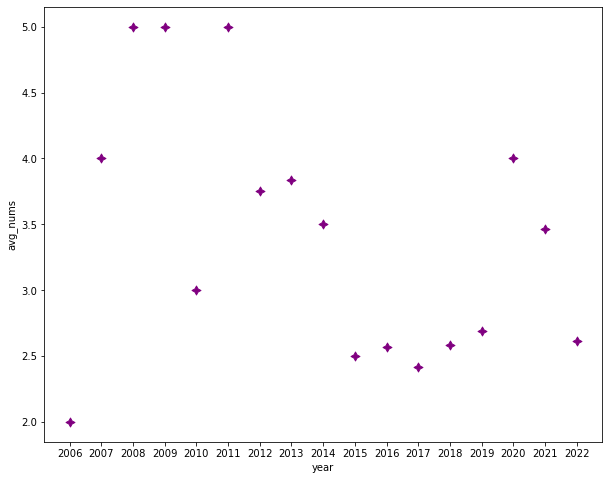

In [53]:
#Generate a scatter plot
#plt.rcParams['figure.figsize'] = (10.0, 3.0)
plt.figure(figsize=(10,8))
plt.xlabel("year")
plt.ylabel("avg_nums")
plt.scatter(Years,LDONums, s=80, c='purple', marker=(4, 1))    # Input scatter data
plt.show() 

A scatter plot was generated using the data stored in the list Years and LDONums; The plt.figure method was used to create a graph with a size of 10" x 8"; The plt.scatter method was used to plot the data points with Years as the x coordinate and LDONums as the y coordinate; The marker size is set to 80, the marker colour to purple and the marker shape to triangle using the s, c and marker parameters of the plt.scatter method respectively.

In [54]:
#Find the name set corresponding to all LDOs
#Determine LDO name from url based on features
def find_LDO_name(url):
    if 'doi.org' in url:
        return 'DOI - Publisher\'s Page'
    elif '.pptx' in url:
        return 'Presentation Slides'
    elif '.mp4' in url or '.avi' in url or '.wmv' in url:
        return 'video'
    elif '.pdf' in url:
        return 'Paper'
    elif '.zip' in url or '.7z' in url:
        return 'Program'
    else:
        return 'other'
    #two suffixes that do not belong to any of the above types, so I classify them as 'other'
    
LDONameSet = []
AllTitles = []
for i in PaperLinks:
    
    response = requests.get(i)
    soup = BeautifulSoup(response.content, "html.parser")
    
    title = soup.find('h1').text
    AllTitles.append(title)
    
    LDOUrls = []
    LDONames = []
    #Find links to LDOs other than YouTube
    LDOs = soup.find_all('div',class_="ImgThumbnailDiv")
    for LDO in LDOs:
        links = LDO.find_all('a')
        for link in links:
            LDOUrls.append(link['href'])
            
    YTBs =soup.find_all('iframe',class_="youtube-player") 
    
    #The LDO name corresponding to the link is analyzed and counted. 
    #Put the name and number into the corresponding list
    LDOUrls = list(set(LDOUrls))
    for LDOUrl in LDOUrls:
        name = find_LDO_name(LDOUrl)
        LDONames.append(name)
    
    CountSet=set(LDONames)
    NumsDict={}
    for item in CountSet:
        NumsDict.update({item:LDONames.count(item)})
    NumsDict['YouTube'] = len(YTBs)
    LDONameSet.append(sorted(NumsDict.items()))

The function find_LDO_name uses a series of if statements to check if certain keywords are present in the URL and on this basis returns a string indicating the type of resource. If the URL contains 'doi.org', the function returns the 'DOI - Publisher' page. If the URL contains '.pptx', the function returns 'Presentation Slides'. If the URL contains '.mp4', '.avi' or '.wmv', the function returns 'video'. If the URL contains '.pdf', the function returns 'essay'. If the URL contains '.zip' or '.7z', the function returns 'Program'. If none of the conditions are met, the function returns 'Other'.

2 'others' were found out of the whole 128 URLs, one of them in row 20 of the table!

In [55]:
TopLDOs  = sorted(zip(PaperLDOs,AllTitles,PaperLinks,LDONameSet),reverse=True)
table_2 = pd.DataFrame(TopLDOs[0:25])
table_2.columns = ['LDOnumber', 'Title', 'Url', 'LDOSet']
table_2.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'center')])])

,LDOnumber,Title,Url,LDOSet
0,10,Interaction Patches for Multi-Character Animation,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_siggraphasia2008interaction5478.htm,"[(""DOI - Publisher's Page"", 1), ('Paper', 1), ('Presentation Slides', 1), ('Program', 1), ('YouTube', 3), ('video', 3)]"
1,7,Simulating Multiple Character Interactions with Collaborative and Adversarial Goals,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_tvcg2012interaction1595.htm,"[(""DOI - Publisher's Page"", 1), ('Paper', 1), ('Presentation Slides', 1), ('YouTube', 2), ('video', 2)]"
2,7,Simulating Interactions of Avatars in High Dimensional State Space,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_i3d2008interaction5368.htm,"[(""DOI - Publisher's Page"", 1), ('Paper', 1), ('Presentation Slides', 1), ('YouTube', 2), ('video', 2)]"
3,7,Resolving Hand-Object Occlusion for Mixed Reality with Joint Deep Learning and Model Optimization,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_casa2020hand1816.htm,"[(""DOI - Publisher's Page"", 1), ('Paper', 1), ('Program', 1), ('YouTube', 2), ('video', 2)]"
4,6,Makeup Style Transfer on Low-quality Images with Weighted Multi-scale Attention,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_icpr2020makeup8430.htm,"[(""DOI - Publisher's Page"", 1), ('Paper', 2), ('Presentation Slides', 1), ('YouTube', 1), ('video', 1)]"
5,6,Foreground-aware Dense Depth Estimation for 360 Images,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_wscg2020depth2109.htm,"[(""DOI - Publisher's Page"", 1), ('Paper', 2), ('Presentation Slides', 1), ('YouTube', 1), ('video', 1)]"
6,6,DSPP: Deep Shape and Pose Priors of Humans,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_mig2019prior7507.htm,"[(""DOI - Publisher's Page"", 1), ('Paper', 1), ('Presentation Slides', 1), ('Program', 1), ('YouTube', 1), ('video', 1)]"
7,6,360 Depth Estimation in the Wild - The Depth360 Dataset and the SegFuse Network,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_vr2022depth8426.htm,"[('Paper', 1), ('Presentation Slides', 1), ('YouTube', 2), ('video', 2)]"
8,5,Topology Aware Data-Driven Inverse Kinematics,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_pg2013topology5337.htm,"[(""DOI - Publisher's Page"", 1), ('Paper', 1), ('Presentation Slides', 1), ('YouTube', 1), ('video', 1)]"
9,5,Single Sketch Image based 3D Car Shape Reconstruction with Deep Learning and Lazy Learning,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_grapp2020car6252.htm,"[(""DOI - Publisher's Page"", 1), ('Paper', 1), ('Presentation Slides', 1), ('YouTube', 1), ('video', 1)]"


#### Question3

On the target website, the publication page contains several features and attributes related to the research articles published by several authors. 

Design and implement the solution to use data analysis and visualization for the following tasks:


#### a.   
Sort the research topics related to the publications of the top ten 'highly cited' authors. 

Analyse which authors collaborate (or appear) as co-authors in the publications based on the research topics. 

Suggest the most popular topics where the authors collaborate with each other. Justify and visualise your outcomes. (10%)


In [9]:
#Iterate through all topics individually, recording the relationship between papers and topics
research_topics = {}
for tplink in TopicsLinks:
    response = requests.get(tplink)
    soup = BeautifulSoup(response.content, "html.parser")
    Papes = soup.find_all('div',class_='ImgIconPublicationDiv') 
    for pa in Papes:
        PaperLink = url_prefix + pa.find('a')['href']
        response = requests.get(PaperLink)
        soup = BeautifulSoup(response.content, "html.parser")

        #titles   
        mytitle = soup.find('h1').text

        if mytitle not in research_topics.keys():
            research_topics[mytitle] = [[tplink.split('_')[-1].split('.')[0]]]
        else:
            research_topics[mytitle][0].append(tplink.split('_')[-1].split('.')[0])

In [10]:
table_3 = pd.DataFrame.from_dict(research_topics,orient='index')
table_3.columns = ['topics']
table_3 = table_3.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')])])
table_3

,topics
GAN-based Reactive Motion Synthesis with Class-aware Discriminators for Human-human Interaction,"['characteranimation', 'interactionmodelling']"
Denoising Diffusion Probabilistic Models for Styled Walking Synthesis,['characteranimation']
Spatio-temporal Manifold Learning for Human Motions via Long-horizon Modeling,['characteranimation']
A Quadruple Diffusion Convolutional Recurrent Network for Human Motion Prediction,['characteranimation']
A Generic Framework for Editing and Synthesizing Multimodal Data with Relative Emotion Strength,"['characteranimation', 'facemodelling']"
Automatic Sign Dance Synthesis from Gesture-based Sign Language,['characteranimation']
DanceDJ: A 3D Dance Animation Authoring System for Live Performance,['characteranimation']
Synthesizing Motion with Relative Emotion Strength,['characteranimation']
Automatic Dance Generation System Considering Sign Language Information,['characteranimation']
Depth Sensor based Facial and Body Animation Control,"['characteranimation', 'facemodelling']"


In [11]:
authors_dict={}     
for pal in PaperLinks:
    authors_string = []
    response = requests.get(pal)
    soup = BeautifulSoup(response.content, "html.parser")
    divcitation = soup.find('div', style="color:orange").text 
    
    # citation
    if 'Citation' in divcitation:  
        divcitation = int(divcitation.split('Citation:')[-1][:-2])
    else:
        divcitation = 0
    
    # title    
    mytitle = soup.find('h1').text
    
    reference = str(soup.find_all('p', class_='TextSmallDefault')[1]).split('<br/>')
    for i in reference:
        if 'AU\xa0\xa0-' in i:
            authors_string.append(i.split("-\xa0")[-1])      
    
    # Iterate through all authors, recording total citations and all paper's titles
    for aut in authors_string:
        if aut not in authors_dict.keys():
            authors_dict[aut] = {'Citations':divcitation, 'paper':[{'title': mytitle, 'citation': divcitation}]}
        else:
            authors_dict[aut]['Citations'] += divcitation 
            authors_dict[aut]['paper'].append({'title': mytitle,'citation': divcitation})

In [12]:
#Combine results and sort
for aut in authors_dict.keys():
    for pa in authors_dict[aut]['paper']:
        pa['topics'] = research_topics[pa['title']][0]
Sort_authors_dict= sorted(authors_dict.items(),key=lambda s: s[1]['Citations'],reverse=True)

In [13]:
#Reassembling data, drawing graphs
author_names = np.array(Sort_authors_dict)[:,0]
author_info =  np.array(Sort_authors_dict)[:,1]
author_citations = []
author_paper_title = []
for i in author_info:
    author_citations.append(i['Citations'])
    author_paper_title.append(i['paper'])
table_4 = pd.DataFrame(data = [author_names, author_citations, author_paper_title]).T
table_4.columns = ['name','Citations','paper']
table_4 = table_4.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')])])
table_4

In [14]:
#Separate topics into a separate column
data = pd.DataFrame(data = [author_names, author_citations, author_paper_title]).T
data.columns = ['name','Citations','paper']

def get_titles(x):
    titles = []
    for i in x:
        all = dict(i)
        titles.append(all['title'])
    return titles

data['titles'] = data['paper'].apply(get_titles)

def get_topics(x):
    topics = []
    for i in x:
        all = dict(i)
        topics += all['topics']
    return set(topics)

data['topics'] = data['paper'].apply(get_topics)
table = data.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')])])
table

In [15]:
# Count all papers by the top 10 authors
paper_title = []
for name in Sort_authors_dict[:10]:
    for title in name[1]['paper']:
        paper_title.append(title['title'])
paper_title=list(set(paper_title))

In [16]:
#Popular areas of statistics
topic_dict = {}
for ti in paper_title:
    for toc in  research_topics[ti][0]:
        if toc not in topic_dict:
            topic_dict[toc]=1
        else:
            topic_dict[toc]+=1 

In [17]:
Sort_topic_dict= sorted(topic_dict.items(),key=lambda s: s[1],reverse=True)
table_5 = pd.DataFrame(data = Sort_topic_dict)
table_5.columns = ['topic','num']
table_5 = table_5.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')])])
table_5

,topic,num
0,characteranimation,26
1,motionanalysis,20
2,interactionmodelling,20
3,biomedicalengineering,17
4,3dreconstruction,16
5,actionrecognition,15
6,surfacemodelling,11
7,virtualreality,9
8,crowdmodelling,9
9,facemodelling,9


In [18]:
#Re-create a dataframe containing all the things to be called for in the third question, 
#including all URLs, titles, LDO numbers, subjects, author names, citations, impact factors, article types, 
#page numbers, years, publishers, volume numbers
def find_type_name(typeofvenue_list):
    if 'CONF' in typeofvenue_list:
        return 'Conference Papers or Posters'
    elif 'JOUR' in typeofvenue_list:
        return 'Journal Papers'
    elif 'CHAP' in typeofvenue_list:
        return 'Book Chapters'
    elif 'Preprint' in typeofvenue_list:
        return 'Eprints'
    elif 'GEN' in typeofvenue_list:
        return 'Patents'
    elif 'THES'in typeofvenue_list:
        return 'Thesis'
    else:
        return 'other'
    
authors_list = []
citations_list = []
titles_list = []
impactfactor_list = []
typeofvenue_list = []
numpages_list = []
year_list=[]
publisher_list = []
volume_list = []
topic_list = []
VenueNames=[]
PaperLinks = []
LDO_nums_list = []
for tplink in TopicsLinks:
    response = requests.get(tplink)
    soup = BeautifulSoup(response.content, "html.parser")
    Papes = soup.find_all('div',class_='ImgIconPublicationDiv') 
    for pa in Papes:
        PaperLink = url_prefix + pa.find('a')['href']
        response = requests.get(PaperLink)
        soup = BeautifulSoup(response.content, "html.parser")
        LDOs = soup.find_all('div',class_="ImgThumbnailDiv")
        YTBs =soup.find_all('iframe',class_="youtube-player") 
        LDO_nums = len(YTBs) + len(LDOs)
        
        #citation , titles, influencing factors
        mytitles=(soup.find('h1').text)
        result = soup.find('div', style="color:orange").text 
        if 'Citation' in result:  
            citation = result.split('Citation:')[-1][:-2]
        else:
            citation = 0
        
        if 'Impact Factor' in result: 
            impactfactor=result.split('Impact Factor: ')[1].split('#')[0]
        else:
            impactfactor = 0

       
        #author name
        authors_string = []
        reference = str(soup.find_all('p', class_='TextSmallDefault')[1]).split('<br/>')
        for i in reference:
            if 'AU\xa0\xa0-' in i:
                authors_string.append(i.split("-\xa0")[-1])    
        
        #type of venue      
        s = str(soup.find_all('p', class_='TextSmallDefault')[1])
        typeofvenue = [i.split("-")[-1].strip() for i in s.split("<br/>") if "-" in i][0]
        
        #Number pages, year, publisher, volume number
        y = str(soup.find_all('p', class_='TextSmallDefault')[0].text)
        if 'numpages={' not in y:
            numpages = 0
        else:
            numpages = y.split('numpages={')[1].split('},')[0]
            
        if 'year={' not in y:
            year = 0
        else:
            year = y.split('year={')[1].split('}')[0]
        
        if 'publisher={' not in y:
            publisher = None
        else:
            publisher = y.split('publisher={')[1].split('}')[0]
        
        if 'volume={' not in y:
            volume = 0
        else:
            volume = y.split('volume={')[1].split('}')[0]
        
        #for aut in authors_string:
            #authors_list.append(aut)
        PaperLinks.append(PaperLink)
        citations_list.append(citation)
        titles_list.append(mytitles)
        LDO_nums_list.append(LDO_nums)
        authors_list.append(str(authors_string)[1:-1])
        impactfactor_list.append(impactfactor)
        numpages_list.append(numpages)
        year_list.append(year)
        publisher_list.append(publisher)
        volume_list.append(volume)
        topic_list.append(str(research_topics[mytitles][0])[1:-1])
        typeofvenue_list.append(typeofvenue)
        VenueNames.append(find_type_name(typeofvenue))

In [19]:
topic_list = np.array(topic_list)
result = list(zip(PaperLinks,titles_list,LDO_nums_list,topic_list,authors_list,citations_list,impactfactor_list,typeofvenue_list,VenueNames,numpages_list,year_list,publisher_list,volume_list))
result = list(set(result))
result = sorted(result, key=lambda s: s[0])
df = pd.DataFrame(data = result)
df.columns =['url','titles','LDO_nums','topics','author_name','citations','impactfactor','typeofvenue','venuenames','numpages','year','publisher','volume']
table = df.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')])])
table

,url,titles,LDO_nums,topics,author_name,citations,impactfactor,typeofvenue,venuenames,numpages,year,publisher,volume
0,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_3dv2021durlar767.htm,DurLAR: A High-fidelity 128-channel LiDAR Dataset with Panoramic Ambientand Reflectivity Imagery for Multi-modal Autonomous Driving Applications,4,"'3dreconstruction', 'robotics'","'Li, Li', 'Ismail, Khalid N.', 'Shum, Hubert P. H.', 'Breckon, Toby P.'",44,0,CONF,Conference Papers or Posters,11,2021,IEEE,0
1,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_access2019network793.htm,A Secure Authentication Protocol for Multi-server-based e-Healthcare using a Fuzzy Commitment Scheme,2,'biometrics',"'Barman, Subhas', 'Shum, Hubert P. H.', 'Chattopadhyay, Samiran', 'Samanta, Debasis'",21,3.367,JOUR,Journal Papers,18,2019,IEEE,7
2,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_access2020infant2992.htm,Abnormal Infant Movements Classification with Deep Learning on Pose-based Features,2,"'motionanalysis', 'biomedicalengineering'","'McCay, Kevin D.', 'Ho, Edmond S. L.', 'Shum, Hubert P. H.', 'Fehringer, Gerhard', 'Marcroft, Claire', 'Embleton, Nicholas'",38,3.367,JOUR,Journal Papers,11,2020,IEEE,8
3,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_access2020network7523.htm,A Privacy-Preserving Efficient Location-Sharing Scheme for Mobile Online Social Network Applications,2,'biometrics',"'Bhattacharya, Munmun', 'Roy, Sandip', 'Mistry, Kamlesh', 'Shum, Hubert P. H.', 'Chattopadhyay, Samiran'",1,3.367,JOUR,Journal Papers,22,2020,IEEE,0
4,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_access2020reidentification3102.htm,Unifying Person and Vehicle Re-identification,2,'biometrics',"'Organisciak, Daniel', 'Sakkos, Dimitrios', 'Ho, Edmond S. L.', 'Aslam, Nauman', 'Shum, Hubert P. H.'",11,3.367,JOUR,Journal Papers,12,2020,IEEE,8
5,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_ace2017dancedj2550.htm,DanceDJ: A 3D Dance Animation Authoring System for Live Performance,4,'characteranimation',"'Iwamoto, Naoya', 'Kato, Takuya', 'Shum, Hubert P. H.', 'Kakitsuka, Ryo', 'Hara, Kenta', 'Morishima, Shigeo'",41,0,CONF,Conference Papers or Posters,18,2017,None,0
6,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_ae2016ergonomic2852.htm,Validation of an Ergonomic Assessment Method using Kinect Data in Real Workplace Conditions,2,'motionanalysis',"'Plantard, Pierre', 'Shum, Hubert P. H.', 'Pierres, Anne-Sophie Le', 'Multon, Franck'",45,3.661,JOUR,Journal Papers,8,2017,Elsevier,65
7,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_aire2020eeg1812.htm,Filtering Techniques for Channel Selection in Motor Imagery EEG Applications: A Survey,2,'biomedicalengineering',"'Baig, Muhammad Zeeshan', 'Aslam, Nauman', 'Shum, Hubert P. H.'",21,8.139,JOUR,Journal Papers,26,2020,Springer,53
8,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_arxiv2006tree4251.htm,Technical Note: Generating Realistic Fighting Scenes by Game Tree,1,"'characteranimation', 'interactionmodelling'","'Shum, Hubert P. H.', 'Komura, Taku'",1,0,Preprint,Eprints,7,2006,None,0
9,https://sitescrape.awh.durham.ac.uk/comp42315/pbl_bhi2021cerebral8050.htm,Interpreting Deep Learning based Cerebral Palsy Prediction with Channel Attention,5,"'motionanalysis', 'biomedicalengineering'","'Zhu, Manli', 'Men, Qianhui', 'Ho, Edmond S. L.', 'Leung, Howard', 'Shum, Hubert P. H.'",55,0,CONF,Conference Papers or Posters,4,2021,IEEE,0


In [20]:
pd.value_counts(df['author_name']).head(15)

'Feng, Qi', 'Shum, Hubert P. H.', 'Morishima, Shigeo'                                                 6
'Plantard, Pierre', 'Shum, Hubert P. H.', 'Multon, Franck'                                            4
'Shum, Hubert P. H.', 'Komura, Taku', 'Yamazaki, Shuntaro'                                            3
'Shum, Hubert P. H.'                                                                                  2
'Zhu, Manli', 'Men, Qianhui', 'Ho, Edmond S. L.', 'Leung, Howard', 'Shum, Hubert P. H.'               2
'Nozawa, Naoki', 'Shum, Hubert P. H.', 'Ho, Edmond S. L.', 'Morishima, Shigeo'                        2
'Zhang, Lining', 'Shum, Hubert P. H.', 'Shao, Ling'                                                   2
'Henry, Joseph', 'Shum, Hubert P. H.', 'Komura, Taku'                                                 2
'Tang, Jeff K. T.', 'Leung, Howard', 'Komura, Taku', 'Shum, Hubert P. H.'                             2
'Shum, Hubert P. H.', 'Hoyet, Ludovic', 'Ho, Edmond S. L.', 'Kom

In [21]:
pd.value_counts(df['typeofvenue']).head(15)

CONF        64
JOUR        59
CHAP         2
Preprint     1
GEN          1
THES         1
Name: typeofvenue, dtype: int64

In [59]:
#Found spaces between topics
df['topics']=df['topics'].apply(lambda x:x.replace(' ',''))

In [60]:
#The authors with 2 or more occurrences were paired to find the articles written by 
#the first 11 groups of paired authors + the corresponding topic
grouped = df.groupby(['author_name'])
top_authors = grouped.apply(lambda x: x['author_name'].count() >= 2)
top_authors_df = df[df['author_name'].isin(top_authors[top_authors].index)]
result = top_authors_df.groupby(['author_name', 'titles','topics']).size().reset_index(name='counts')

result #29 rows

,author_name,titles,topics,counts
0,"'Feng, Qi', 'Shum, Hubert P. H.', 'Morishima, ...",360 Depth Estimation in the Wild - The Depth36...,'3dreconstruction',1
1,"'Feng, Qi', 'Shum, Hubert P. H.', 'Morishima, ...",Bi-projection based Foreground-aware Omnidirec...,'3dreconstruction',1
2,"'Feng, Qi', 'Shum, Hubert P. H.', 'Morishima, ...",Foreground-aware Dense Depth Estimation for 36...,'3dreconstruction',1
3,"'Feng, Qi', 'Shum, Hubert P. H.', 'Morishima, ...",Occlusion for 3D Object Manipulation with Hand...,"'virtualreality','handandgesture'",1
4,"'Feng, Qi', 'Shum, Hubert P. H.', 'Morishima, ...",Resolving Hand-Object Occlusion for Mixed Real...,"'virtualreality','handandgesture'",1
5,"'Feng, Qi', 'Shum, Hubert P. H.', 'Morishima, ...",Resolving Occlusion for 3D Object Manipulation...,"'virtualreality','handandgesture'",1
6,"'Henry, Joseph', 'Shum, Hubert P. H.', 'Komura...",Environment-aware Real-Time Crowd Control,'crowdmodelling',1
7,"'Henry, Joseph', 'Shum, Hubert P. H.', 'Komura...",Interactive Formation Control in Complex Envir...,'crowdmodelling',1
8,"'Nozawa, Naoki', 'Shum, Hubert P. H.', 'Ho, Ed...",3D Car Shape Reconstruction from a Single Sket...,"'3dreconstruction','surfacemodelling'",1
9,"'Nozawa, Naoki', 'Shum, Hubert P. H.', 'Ho, Ed...",Single Sketch Image based 3D Car Shape Reconst...,"'3dreconstruction','surfacemodelling'",1


In [61]:
#Constructing new data structures
df_new = pd.DataFrame(columns=['author_name', 'topics', 'counts'])
for index, row in result.iterrows():
    for topic in row['topics'].split(','):
        df_new = df_new.append({'author_name': row['author_name'], 'topics': topic, 'counts': row['counts']}, ignore_index=True)


/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_60765/468432628.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'author_name': row['author_name'], 'topics': topic, 'counts': row['counts']}, ignore_index=True)
/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_60765/468432628.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'author_name': row['author_name'], 'topics': topic, 'counts': row['counts']}, ignore_index=True)
/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_60765/468432628.py:5: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_new = df_new.append({'author_name': row['author_name'], 'topics': topic, 'counts': row['counts']}, ignore_i

In [62]:
#Group statistics
grouped = df_new.groupby(['author_name', 'topics']).sum()
grouped = grouped.groupby(level=0).sum()
grouped = grouped.reset_index()

grouped = df_new.groupby(['author_name', 'topics']).sum().reset_index()
grouped = grouped.pivot(index='author_name', columns='topics', values='counts')
grouped.fillna(0,inplace=True)
#grouped.columns

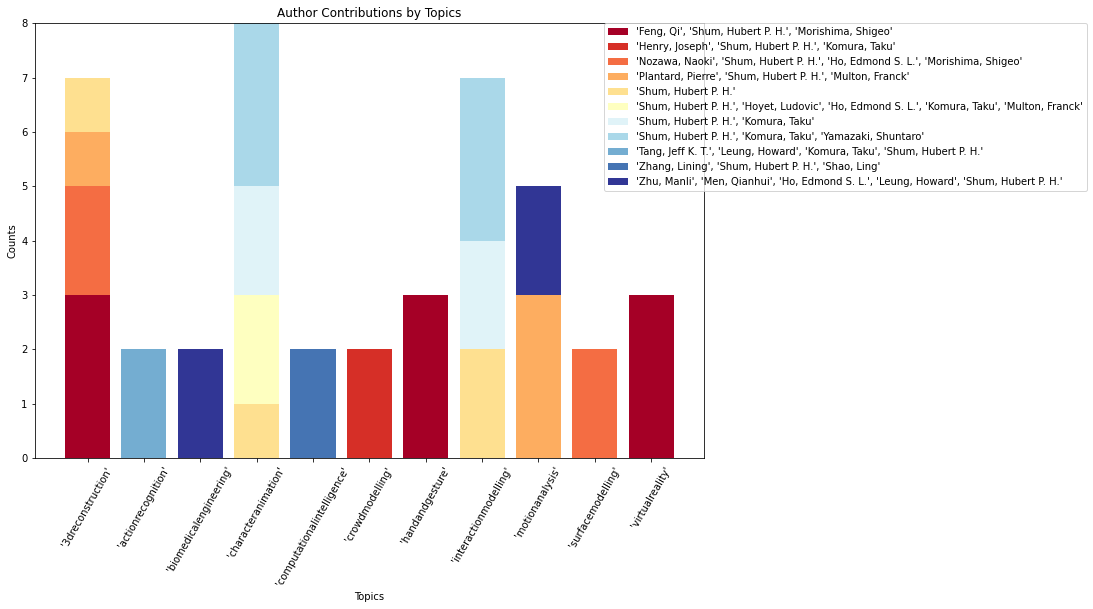

In [63]:
#plot the picture
import matplotlib.cm as cm

plt.figure(figsize=(12, 8))

labels = grouped.columns

colors = plt.cm.RdYlBu(np.linspace(0, 1, len(labels)))

author = grouped.index
bottom_y = [0] * len(labels)

for author, color in zip(grouped.index, colors):    
    plt.bar(labels, grouped.loc[author], bottom=bottom_y, color=color, label=author)
    #Accumulate the data to calculate the new bottom_y
    bottom_y = [a+b for a, b in zip(grouped.loc[author].values, bottom_y)]

plt.legend(bbox_to_anchor=(0.85, 1), loc='upper left', borderaxespad=0.)

plt.xlabel('Topics')
plt.ylabel('Counts')
plt.title('Author Contributions by Topics')

plt.xticks(rotation=60)
plt.show()

interactionmodelling: 7
biomedicalengineering:2
_3dreconstruction:7
surfacemodelling:2
handandgesture:3


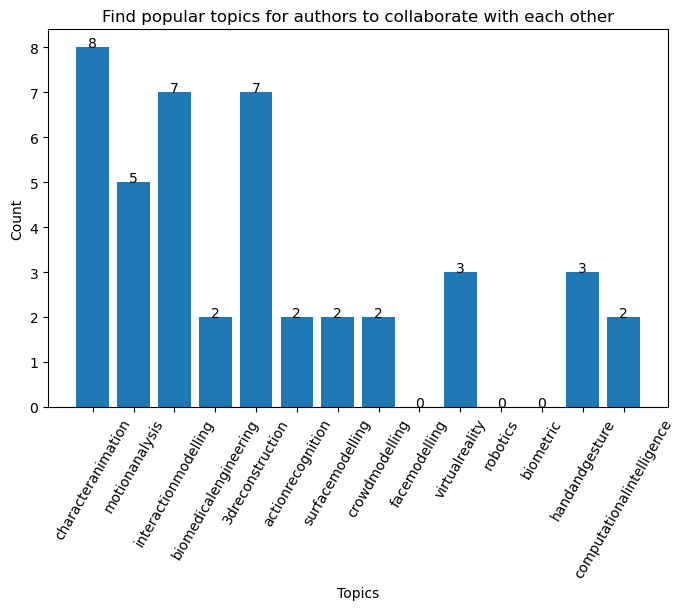

In [64]:
#Find the most popular topics on which authors collaborate with each other, counting
characteranimation_count = 0
motionanalysis_count = 0
interactionmodelling_count = 0
biomedicalengineering_count = 0
_3dreconstruction_count = 0
actionrecognition_count = 0
surfacemodelling_count = 0
crowdmodelling_count = 0
facemodelling_count = 0
virtualreality_count = 0
robotics_count = 0
biometric_count = 0
handandgesture_count = 0
computationalintelligence_count = 0

for topics_string in result['topics']:
    topics = topics_string.split(',')
    for topic in topics:
        if 'characteranimation' in topic:
            characteranimation_count += 1
        elif 'motionanalysis' in topic:
            motionanalysis_count += 1
        elif 'interactionmodelling' in topic:
            interactionmodelling_count += 1
        elif 'biomedicalengineering' in topic:
            biomedicalengineering_count += 1
        elif '3dreconstruction' in topic:
            _3dreconstruction_count += 1
        elif 'actionrecognition' in topic:
            actionrecognition_count += 1
        elif 'surfacemodelling' in topic:
            surfacemodelling_count += 1
        elif 'crowdmodelling' in topic:
            crowdmodelling_count += 1
        elif 'facemodelling' in topic:
            facemodelling_count += 1
        elif 'virtualreality' in topic:
            virtualreality_count += 1
        elif 'robotics' in topic:
            robotics_count += 1
        elif 'biometric' in topic:
            biometric_count += 1
        elif 'handandgesture' in topic:
            handandgesture_count += 1
        elif 'computationalintelligence' in topic:
            computationalintelligence_count += 1


#Check that when there is more than one topic, the later ones are not counted     
print(f"interactionmodelling: {interactionmodelling_count}")
print(f"biomedicalengineering:{biomedicalengineering_count}")	
print(f'_3dreconstruction:{_3dreconstruction_count}')
print(f'surfacemodelling:{surfacemodelling_count}')
print(f'handandgesture:{handandgesture_count}')

fig = plt.figure(figsize=(8,5), dpi=100)
x_labels = ['characteranimation', 'motionanalysis', 'interactionmodelling', 'biomedicalengineering', '3dreconstruction', 
           'actionrecognition', 'surfacemodelling', 'crowdmodelling', 'facemodelling', 'virtualreality', 'robotics', 
           'biometric', 'handandgesture', 'computationalintelligence']

y_labels = [characteranimation_count, motionanalysis_count, interactionmodelling_count, biomedicalengineering_count,
           _3dreconstruction_count, actionrecognition_count, surfacemodelling_count, crowdmodelling_count, 
           facemodelling_count, virtualreality_count, robotics_count, biometric_count, handandgesture_count, 
           computationalintelligence_count]



plt.bar(x_labels, y_labels)
plt.title('Find popular topics for authors to collaborate with each other')
plt.xlabel('Topics')
plt.ylabel('Count')
plt.xticks(rotation=60)
for i, v in enumerate(y_labels):
    plt.text(i, v, str(v), ha='center')
#fig.patch.set_facecolor('white') Background colours
plt.show()


In [65]:
#solution2 to create the data frame: Individual authors prevail
authors_list = []
citations_list = []
titles_list = []
impactfactor_list = []
typeofvenue_list = []
numpages_list = []
year_list=[]
publisher_list = []
volume_list = []
topic_list = []
VenueNames=[]
for tplink in TopicsLinks:
    response = requests.get(tplink)
    soup = BeautifulSoup(response.content, "html.parser")
    Papes = soup.find_all('div',class_='ImgIconPublicationDiv') 
    for pa in Papes:
        PaperLink = url_prefix + pa.find('a')['href']
        response = requests.get(PaperLink)
        soup = BeautifulSoup(response.content, "html.parser")
        
        mytitles=(soup.find('h1').text)
        result = soup.find('div', style="color:orange").text 
        if 'Citation' in result:  
            citation = result.split('Citation:')[-1][:-2]
        else:
            citation = 0
        
        if 'Impact Factor' in result: 
            impactfactor=result.split('Impact Factor: ')[1].split('#')[0]
        else:
            impactfactor = 0

        authors_string = []
        reference = str(soup.find_all('p', class_='TextSmallDefault')[1]).split('<br/>')
        for i in reference:
            if 'AU\xa0\xa0-' in i:
                authors_string.append(i.split("-\xa0")[-1]) 
        
                      
        s = str(soup.find_all('p', class_='TextSmallDefault')[1])
        typeofvenue = [i.split("-")[-1].strip() for i in s.split("<br/>") if "-" in i][0]
        
        
        y = str(soup.find_all('p', class_='TextSmallDefault')[0].text)
        if 'numpages={' not in y:
            numpages = 0
        else:
            numpages = y.split('numpages={')[1].split('},')[0]
            
        if 'year={' not in y:
            year = 0
        else:
            year = y.split('year={')[1].split('}')[0]
        
        if 'publisher={' not in y:
            publisher = None
        else:
            publisher = y.split('publisher={')[1].split('}')[0]
        
        if 'volume={' not in y:
            volume = 0
        else:
            volume = y.split('volume={')[1].split('}')[0]
        
        for aut in authors_string:
            authors_list.append(aut)
            citations_list.append(citation)
            titles_list.append(mytitles)

            impactfactor_list.append(impactfactor)
            numpages_list.append(numpages)
            year_list.append(year)
            publisher_list.append(publisher)
            volume_list.append(volume)
            topic_list.append(str(research_topics[mytitles][0])[1:-1])
            
            typeofvenue_list.append(typeofvenue)
            VenueNames.append(find_type_name(typeofvenue))

result_p = list(zip(authors_list,citations_list,titles_list,topic_list,impactfactor_list,typeofvenue_list,VenueNames,numpages_list,year_list,publisher_list,volume_list))
result_p = list(set(result_p))
result_p = sorted(result_p, key=lambda s: s[0])
df_p = pd.DataFrame(data = result_p)
df_p.columns =['author_name','citations','titles','topics','impactfactor','typeofvenue','venuenames','numpages','year','publisher','volume']
#df.style.background_gradient(cmap='Blues')
table_p = df_p.style.set_properties(**{'text-align': 'left'}).set_table_styles([ dict(selector='th', props=[('text-align', 'left')])])
table_p

,author_name,citations,titles,topics,impactfactor,typeofvenue,venuenames,numpages,year,publisher,volume
0,"Anderson, Philip",1,NETIVAR: NETwork Information Visualization based on Augmented Reality,'virtualreality',0,CONF,Conference Papers or Posters,8,2018,IEEE,0
1,"Asahina, Wakana",21,Automatic Dance Generation System Considering Sign Language Information,'characteranimation',0,CONF,Conference Papers or Posters,2,2016,ACM,0
2,"Asahina, Wakana",3,Automatic Sign Dance Synthesis from Gesture-based Sign Language,'characteranimation',0,CONF,Conference Papers or Posters,9,2019,ACM,0
3,"Aslam, Nauman",7,A Unified Deep Metric Representation for Mesh Saliency Detection and Non-rigid Shape Matching,'surfacemodelling',6.513,JOUR,Journal Papers,15,2020,IEEE,22
4,"Aslam, Nauman",1,Sparse Metric-based Mesh Saliency,'surfacemodelling',5.719,JOUR,Journal Papers,13,2020,Elsevier,400
5,"Aslam, Nauman",8,Unsupervised Abnormal Behaviour Detection with Overhead Crowd Video,'crowdmodelling',0,CONF,Conference Papers or Posters,6,2017,IEEE,0
6,"Aslam, Nauman",37,A Dual-Stream Recurrent Neural Network for Student Feedback Prediction using Kinect,'motionanalysis',0,CONF,Conference Papers or Posters,8,2018,IEEE,0
7,"Aslam, Nauman",12,A New Method to Evaluate the Dynamic Air Gap Thickness and Garment Sliding of Virtual Clothes During Walking,'surfacemodelling',1.820,JOUR,Journal Papers,14,2019,SAGE,89
8,"Aslam, Nauman",50,Differential Evolution Algorithm as a Tool for Optimal Feature Subset Selection in Motor Imagery EEG,'biomedicalengineering',6.954,JOUR,Journal Papers,12,2017,Elsevier,90
9,"Aslam, Nauman",19,A Motion Classification Approach to Fall Detection,'actionrecognition',0,CONF,Conference Papers or Posters,6,2017,IEEE,0


#### b.   
Analyse the relationship between the features of the publication and the "citation" count. 

Suggest the top three features that have the highest impact on the "citation" count. 

Justify your answers with valid reasons. (10%)

In [66]:
#There is a special volume number
df[['topics','publisher','typeofvenue','LDO_nums','impactfactor','numpages','year','volume']].loc[24,'volume']

'197-198'

There are 8 features that influence citation, 5 numerical variables: impact factor, year, number pages, volume number, LDO number, and 3 categorical variables: publisher, type of venue, topics.

ANOVA analysis (comparison of means of grouped variables) is applied to numerical dependent variables (y) and sub-type independent variables (X), while categorical variables 'topics', 'publisher', 'typeofvenue' are three and do not fit in one ANOVA model. In such cases, multiple linear regression or factor analysis may be considered.

In [67]:
#Multiple linear regression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import OneHotEncoder


X = df[['topics','publisher','typeofvenue','LDO_nums','impactfactor','numpages','year','volume']]

cat_features = ['topics','publisher','typeofvenue']
# X = pd.get_dummies(X, columns=cat_features) # on hot

for cat_feature in cat_features:
    X[cat_feature] = pd.factorize(X[cat_feature])[0]

con_features = ['LDO_nums','impactfactor','numpages','year','volume']
#HandleSpecialValue
X.loc[24,'volume'] = '2'
for con_feature in con_features:
    # print(con_feature)
    X[con_feature] = X[con_feature].astype('float')

y = df["citations"]

model = LinearRegression()
model.fit(X, y)

coefficients = model.coef_
coefficients

/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_60765/3819622204.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_feature] = pd.factorize(X[cat_feature])[0]
/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_60765/3819622204.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[con_feature] = X[con_feature].astype('float')


array([-3.65348797e-01,  8.22356511e-02, -7.28567262e+00,  9.80453476e+00,
        4.46415631e+00,  1.14717614e-01, -2.66736222e+00, -3.47455664e-03])

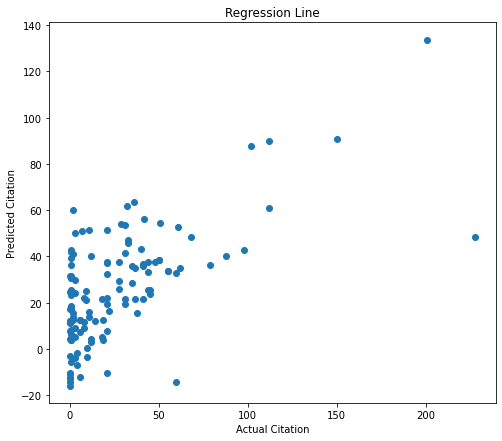

In [69]:
fig = plt.figure(figsize=(8,7))
y_pred = model.predict(X)
y = y.astype('int')
plt.scatter(y, y_pred)
plt.xlabel("Actual Citation")
plt.ylabel("Predicted Citation")
plt.title("Regression Line")
plt.show()

In [70]:
X['citation'] = y
pd.DataFrame(X.corr()['citation']).sort_values(by='citation',ascending=False)

/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_60765/3367532206.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['citation'] = y


,citation
citation,1.000000
LDO_nums,0.507015
impactfactor,0.290980
numpages,0.043058
volume,0.030711
publisher,0.028810
typeofvenue,0.017670
topics,-0.020502
year,-0.326068


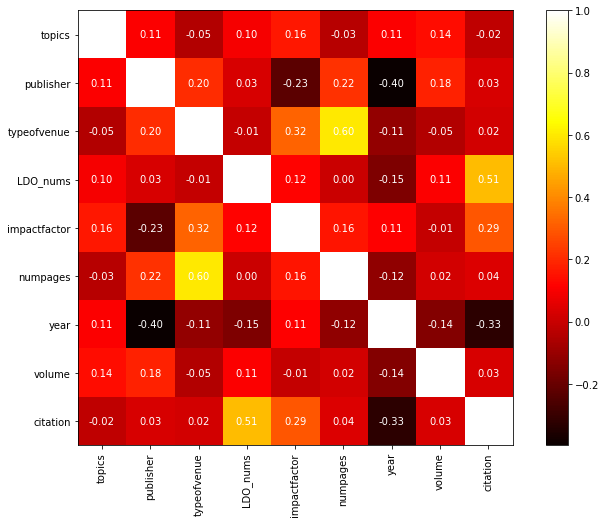

In [71]:
corr = np.corrcoef(X.T)

fig, ax = plt.subplots(figsize=(12, 8))
im = ax.imshow(corr, cmap='hot')

# Add annotations to each cell
for i in range(len(corr)):
    for j in range(len(corr)):
        ax.text(j, i, "{:.2f}".format(corr[i, j]), ha="center", va="center", color="w")

        
ax.set_xticks(np.arange(len(corr)))
ax.set_xticklabels(X.columns, rotation=90)
ax.set_yticks(np.arange(len(corr)))
ax.set_yticklabels(X.columns)

plt.colorbar(im)
plt.show()

<AxesSubplot:>

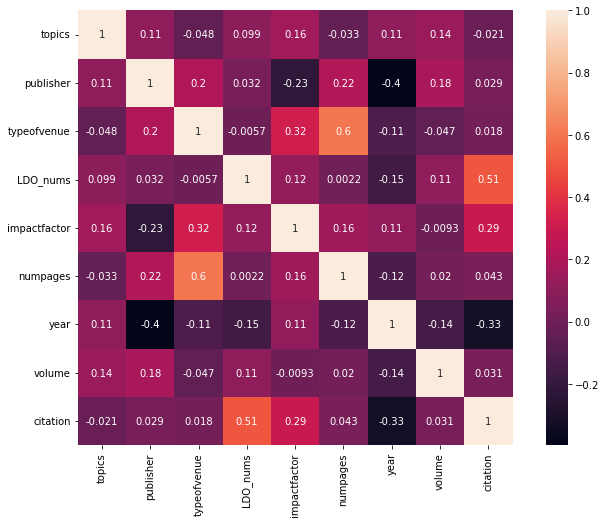

In [73]:
# import seaborn as sns
# fig = plt.figure(figsize=(12,8))
# sns.heatmap(X.corr(),square=True, annot=True)

model.feature_importances_: [0.0931637  0.09917857 0.00981188 0.32990798 0.12262926 0.05250292
 0.13195485 0.16085084]
[3 7 6 4 1 0 5 2]


/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_60765/151190819.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[cat_feature] = pd.factorize(X[cat_feature])[0]
/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_60765/151190819.py:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X[con_feature] = X[con_feature].astype('float')


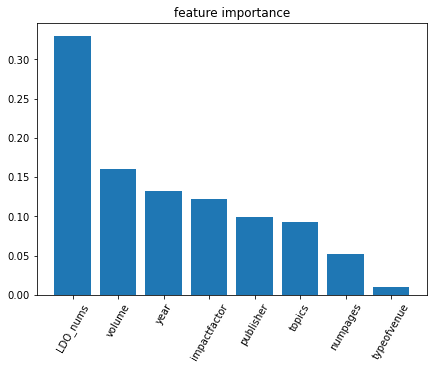

In [74]:
#Linear fitting does not work well
#switch to decision trees to determine the importance of predictor variables
from sklearn.tree import DecisionTreeRegressor
feature_names = ['topics','publisher','typeofvenue','LDO_nums','impactfactor','numpages','year','volume']
X = df[feature_names]

cat_features = ['topics','publisher','typeofvenue']
# X = pd.get_dummies(X, columns=cat_features) # on hot

for cat_feature in cat_features:
    X[cat_feature] = pd.factorize(X[cat_feature])[0]

con_features = ['LDO_nums','impactfactor','numpages','year','volume']
X.loc[24,'volume'] = '2'
for con_feature in con_features:
    # print(con_feature)
    X[con_feature] = X[con_feature].astype('float')

y = df["citations"]

model = DecisionTreeRegressor()
model.fit(X, y)
# Calculating feature importance
importances = model.feature_importances_
print("model.feature_importances_: {}".format(importances))

# print(importances)
# Ranking the importance of features
indices = np.argsort(importances)[::-1]
print(indices)
# Get feature name
names = [feature_names[i] for i in indices]
# Drawings
fig = plt.figure(figsize=(7,5))
plt.title("feature importance")
# features.shape[1]  Length of the array
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=60)
plt.show()

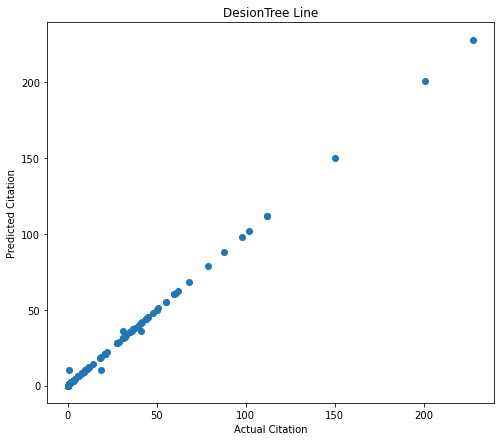

In [75]:
fig = plt.figure(figsize=(8,7))
y_pred = model.predict(X)
y = y.astype('int')
plt.scatter(y, y_pred)
plt.xlabel("Actual Citation")
plt.ylabel("Predicted Citation")
plt.title("DesionTree Line")
plt.show()

[Text(0.6162642045454545, 0.9666666666666667, 'X[3] <= 8.5\nsquared_error = 1325.422\nsamples = 128\nvalue = 25.516'),
 Text(0.6071732954545455, 0.9, 'X[3] <= 3.5\nsquared_error = 1091.47\nsamples = 127\nvalue = 24.134'),
 Text(0.3728693181818182, 0.8333333333333334, 'X[6] <= 2021.5\nsquared_error = 259.324\nsamples = 73\nvalue = 13.068'),
 Text(0.3637784090909091, 0.7666666666666667, 'X[3] <= 2.5\nsquared_error = 270.49\nsamples = 60\nvalue = 15.9'),
 Text(0.23664772727272726, 0.7, 'X[4] <= 2.576\nsquared_error = 183.819\nsamples = 51\nvalue = 12.843'),
 Text(0.11875, 0.6333333333333333, 'X[0] <= 25.5\nsquared_error = 124.073\nsamples = 37\nvalue = 9.622'),
 Text(0.10965909090909091, 0.5666666666666667, 'X[0] <= 7.5\nsquared_error = 55.062\nsamples = 36\nvalue = 8.222'),
 Text(0.05454545454545454, 0.5, 'X[7] <= 2.5\nsquared_error = 14.284\nsamples = 13\nvalue = 4.846'),
 Text(0.03636363636363636, 0.43333333333333335, 'X[1] <= 15.0\nsquared_error = 10.446\nsamples = 11\nvalue = 3.909')

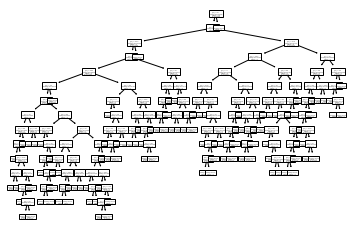

In [76]:
from sklearn import tree
data = tree.export_graphviz(model, out_file='tree.dot')
# graph = graphviz.Source(data)
tree.plot_tree(model)

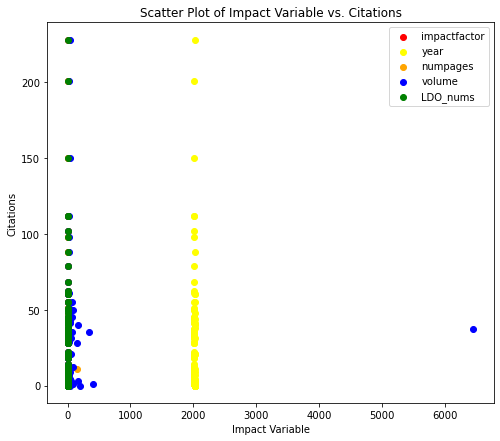

In [78]:
#5 numeric variables in relation to citaiton

df['impactfactor'] = pd.to_numeric(df['impactfactor'], errors='coerce')
df['citations'] = pd.to_numeric(df['citations'], errors='coerce')
df['numpages'] = pd.to_numeric(df['numpages'], errors='coerce')
df['volume'] = pd.to_numeric(df['volume'], errors='coerce')
df['year'] = pd.to_numeric(df['year'], errors='coerce')

fig = plt.figure(figsize=(8,7))
plt.scatter(df['impactfactor'], df['citations'],color='red', label='impactfactor')
plt.scatter(df['year'], df['citations'],color='yellow', label='year')
plt.scatter(df['numpages'], df['citations'],color='orange', label='numpages')
plt.scatter(df['volume'], df['citations'],color='blue', label='volume')
plt.scatter(df['LDO_nums'], df['citations'],color='green', label='LDO_nums')

plt.legend(loc='upper right')
plt.xlabel('Impact Variable')
plt.ylabel('Citations')
plt.title('Scatter Plot of Impact Variable vs. Citations')
plt.show()

Text(0.5, 1.0, 'Type of Venue')

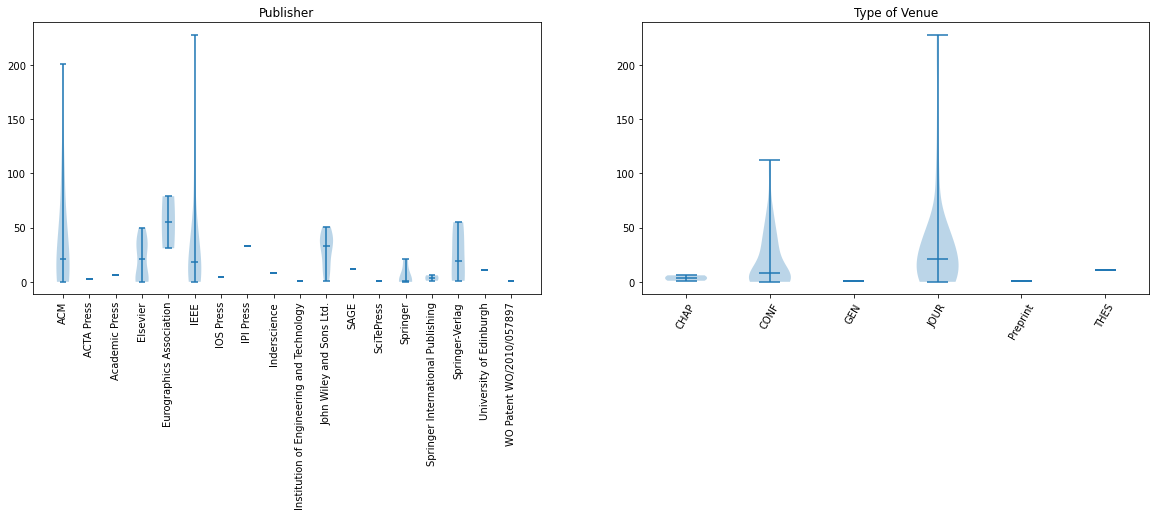

In [79]:
#Relationship between the 3 categorical variables and citations
fig, ax = plt.subplots(1, 2, figsize=(20,5))

publisher_groups = df.groupby('publisher')
typeofvenue_groups = df.groupby('typeofvenue')
topics_groups = df.groupby('topics')

publisher_violins = ax[0].violinplot([group['citations'].values for _, group in publisher_groups],
                            showmedians=True, showextrema=True)
plt.xticks(rotation=60)
ax[0].set_xticks(np.arange(1, len(publisher_groups)+1),rotation=60)
ax[0].set_xticklabels(publisher_groups.groups.keys(),rotation=90)
# ax[0].set_xticklabels(labels=x, rotation=90)
ax[0].yaxis.set_label_coords(-10,0.5)
ax[0].set_title("Publisher")

typeofvenue_violins = ax[1].violinplot([group['citations'].values for _, group in typeofvenue_groups],
                            showmedians=True, showextrema=True)
ax[1].set_xticks(np.arange(1, len(typeofvenue_groups)+1))
ax[1].set_xticklabels(typeofvenue_groups.groups.keys())
ax[1].set_title("Type of Venue")

# topics_violins = ax[2].violinplot([group['citations'].values for _, group in topics_groups],
#                             showmedians=True, showextrema=True)
# ax[2].set_xticks(np.arange(1, len(topics_groups)+1))
# # ax[2].set_xticklabels(topics_groups.keys())
# ax[2].set_title("Topics")

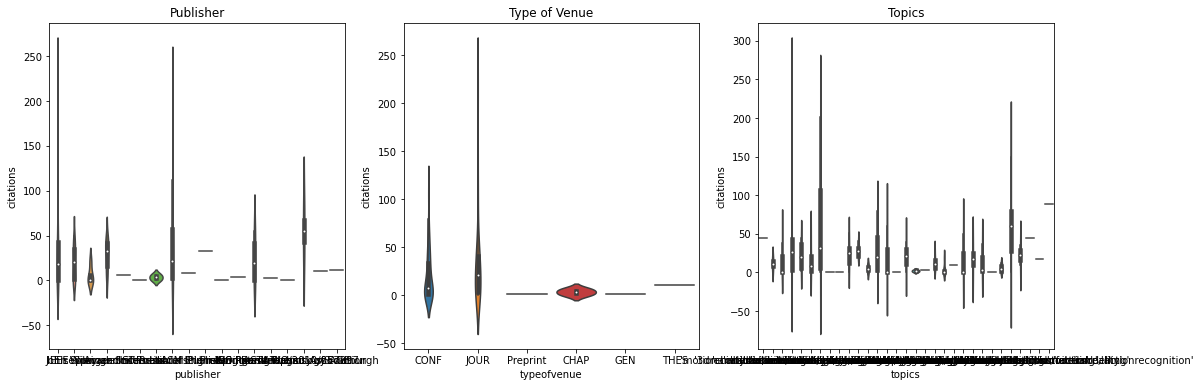

In [80]:
# import seaborn as sns

# publisher_groups = df.groupby('publisher')
# venuetype_groups = df.groupby('typeofvenue')
# topics_groups = df.groupby('topics')

# fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(18, 6))

# sns.violinplot(x='publisher', y='citations', data=df, ax=ax[0])
# sns.violinplot(x='typeofvenue', y='citations', data=df, ax=ax[1])
# sns.violinplot(x='topics', y='citations', data=df, ax=ax[2])

# ax[0].set_title("Publisher")
# ax[1].set_title("Type of Venue")
# ax[2].set_title("Topics")

# plt.show()

#### c.   
Each publication is published in a specific type of venue (such as “journal” or “conferernce”). 

You have to identify a specific feature "impact factor" for the publications and analyse its relationship with the type of venue where the article has been published. (10%)

In [81]:
df2 = df[['typeofvenue','impactfactor']]
df2

,typeofvenue,impactfactor
0,CONF,0.000
1,JOUR,3.367
2,JOUR,3.367
3,JOUR,3.367
4,JOUR,3.367
...,...,...
123,CONF,0.000
124,CONF,0.000
125,CONF,0.000
126,JOUR,0.000


In [82]:
#Cardinal independence test
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(df2['typeofvenue'], df2['impactfactor'])
chi2, p, dof, expected = chi2_contingency(contingency_table)

result_chi2 = {'Chi-Square Value': [chi2], 'P-Value': [p], 'Degrees of Freedom': [dof]}
df_chi2 = pd.DataFrame(data=result_chi2)
print(df_chi2)

if p < 0.05:
    print("The relationship between typeofvenue and impactfactor is significant.")
else:
    print("The relationship between typeofvenue and impactfactor is not significant.")

   Chi-Square Value   P-Value  Degrees of Freedom
0         92.848745  0.935978                 115
The relationship between typeofvenue and impactfactor is not significant.


A chi-square test is usually used to test the correlation between two categorical variables. it is a method of hypothesis testing for differences between observed and expected frequencies. If the chi-square test is performed before the categorical variable has been mapped to a number, the method cannot deal with continuous numerical variables and therefore does not apply to impactfactor. however, one-dimensional ANOVA is suitable for analysing the relationship between a categorical variable and a numerical variable. If typeofvenue is a categorical variable and impactfactor is a numerical variable, then typeofvenue needs to be mapped to a number in order to perform a one-way ANOVA in Scipy.

In [83]:
#One-dimensional analysis of variance
#Mapping typeofvenue's 6 types to numbers
df['typeofvenue'] = df2['typeofvenue'].map({'CONF': 1, 'JOUR': 2, 'Preprint': 3, 'CHAP':4, 'GEN':5, 'THES':6})

from scipy.stats import f_oneway

group1 = df[df['typeofvenue'] == 1]['impactfactor']
group2 = df[df['typeofvenue'] == 2]['impactfactor']
group3 = df[df['typeofvenue'] == 3]['impactfactor']
group4 = df[df['typeofvenue'] == 4]['impactfactor']
group5 = df[df['typeofvenue'] == 5]['impactfactor']
group6 = df[df['typeofvenue'] == 6]['impactfactor']

f_stat, p_value = f_oneway(group1, group2, group3, group4, group5, group6)

print("F-statistic:", f_stat)
print("P-value:", p_value)

#The p-value is less than 0.05, indicating that typeofvenue has a significant effect on impactfactor

F-statistic: 19.440192177290353
P-value: 3.368868484345184e-14


In [84]:
# Analysis directly through visualisation
df2[df2['typeofvenue'] == 'CONF']

,typeofvenue,impactfactor
0,CONF,0.0
5,CONF,0.0
9,CONF,0.0
10,CONF,0.0
11,CONF,0.0
...,...,...
121,CONF,0.0
122,CONF,0.0
123,CONF,0.0
124,CONF,0.0


<AxesSubplot:ylabel='impactfactor'>

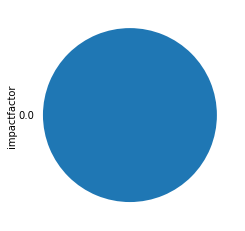

In [85]:
df2[df2['typeofvenue'] == 'CONF']['impactfactor'].value_counts().plot.pie()

<AxesSubplot:ylabel='impactfactor'>

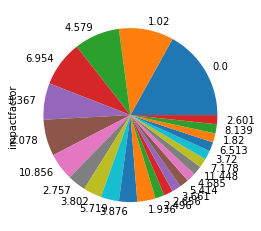

In [86]:
df2[df2['typeofvenue'] == 'JOUR']['impactfactor'].value_counts().plot.pie()

In [87]:
df2['typeofvenue'].unique()

array(['CONF', 'JOUR', 'Preprint', 'CHAP', 'GEN', 'THES'], dtype=object)

<AxesSubplot:ylabel='impactfactor'>

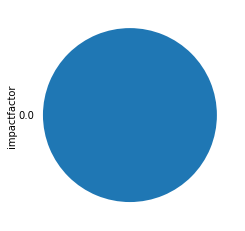

In [88]:
df2[df2['typeofvenue'] == 'Preprint']['impactfactor'].value_counts().plot.pie()

<AxesSubplot:ylabel='impactfactor'>

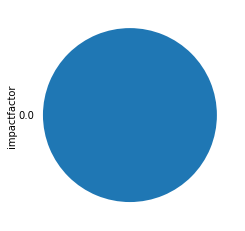

In [89]:
df2[df2['typeofvenue'] == 'CHAP']['impactfactor'].value_counts().plot.pie()

<AxesSubplot:ylabel='impactfactor'>

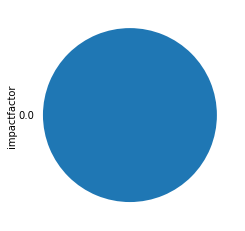

In [90]:
df2[df2['typeofvenue'] == 'GEN']['impactfactor'].value_counts().plot.pie()

<AxesSubplot:ylabel='impactfactor'>

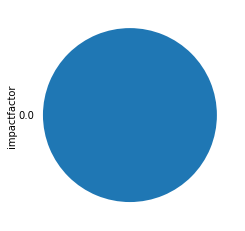

In [91]:
df2[df2['typeofvenue'] == 'THES']['impactfactor'].value_counts().plot.pie()

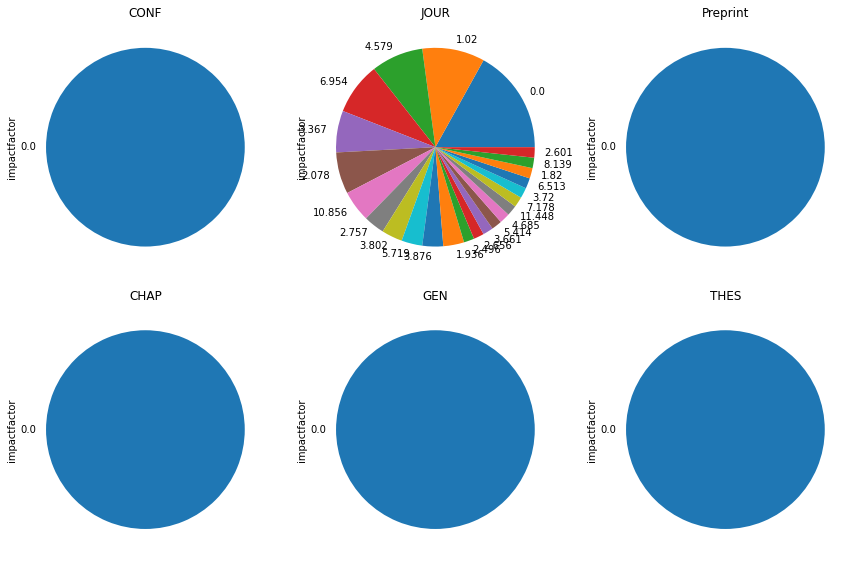

In [92]:
#Combine 6 pie charts
fig, axs = plt.subplots(2, 3, figsize=(12,8))
axs = axs.ravel()

types = ['CONF', 'JOUR', 'Preprint', 'CHAP', 'GEN', 'THES']

for i, typeofvenue in enumerate(types):
    df2[df2['typeofvenue'] == typeofvenue]['impactfactor'].value_counts().plot.pie(ax=axs[i])
    axs[i].set_title(typeofvenue)

plt.tight_layout()
plt.show()

/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_60765/2746924386.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['impactfactor'] = pd.to_numeric(df2['impactfactor'], errors='coerce')


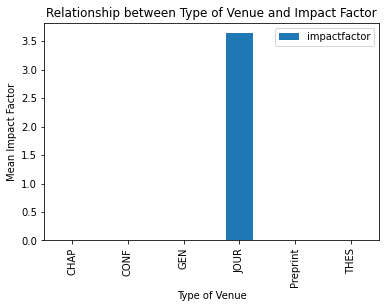

In [93]:
df2['impactfactor'] = pd.to_numeric(df2['impactfactor'], errors='coerce')

# Create a bar plot showing the mean impact factor for each type of venue
df2.groupby('typeofvenue').mean().plot(kind='bar')

# Add labels and title to the plot
plt.xlabel('Type of Venue')
plt.ylabel('Mean Impact Factor')
plt.title('Relationship between Type of Venue and Impact Factor')

# Show the plot
plt.show()

#### Question 4
The target clinical dataset contains different features related to the COVID symptoms and the severity of the disease.

Design and implement the solution to perform analysis to identify the uncertain and complex inter-dependencies between Covid-19 symptoms 

and validate the prediction of the severity of Covid-19 and its determinants probabilistically. 

Justify the design choice and showcase the findings using an appropriate visualisation tool. 

Explain your design, highlight features, and showcase your findings in no more than 200 words. (20%)


In [94]:
# !pip install pgmpy

In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import pgmpy as pg
import tabulate as tb
import networkx as nx

In [96]:
#loading data
df=pd.read_csv('covid.csv', sep=',', header=0)
df.head(10)

,id,headache,lossOfSmell,musclePain,cough,soreThroat,chestPain,fever,hoarseness,lossOfAppetite,diarrhea,fatigue,confusion,shortnessOfBreath,AbdominalPain,level
0,0,1,1,1,1,1,1,0,0,0,0,0,0,0,0,1
1,1,1,1,1,1,1,0,1,1,1,0,0,0,0,0,2
2,2,1,1,0,0,1,1,0,0,1,1,0,0,0,0,3
3,3,1,1,0,1,0,1,1,1,0,1,1,0,0,0,4
4,4,1,1,1,1,1,1,1,1,1,0,1,1,0,0,5
5,5,1,1,1,1,1,1,1,1,1,1,1,1,1,1,6
6,6,0,0,1,0,1,0,0,1,1,0,1,1,0,0,0
7,7,1,0,1,0,0,1,0,0,0,0,0,1,1,1,0
8,8,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0
9,9,1,1,0,0,1,1,0,0,1,1,1,0,1,1,0


In [97]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200000 entries, 0 to 199999
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype
---  ------             --------------   -----
 0   id                 200000 non-null  int64
 1   headache           200000 non-null  int64
 2   lossOfSmell        200000 non-null  int64
 3   musclePain         200000 non-null  int64
 4   cough              200000 non-null  int64
 5   soreThroat         200000 non-null  int64
 6   chestPain          200000 non-null  int64
 7   fever              200000 non-null  int64
 8   hoarseness         200000 non-null  int64
 9   lossOfAppetite     200000 non-null  int64
 10  diarrhea           200000 non-null  int64
 11  fatigue            200000 non-null  int64
 12  confusion          200000 non-null  int64
 13  shortnessOfBreath  200000 non-null  int64
 14  AbdominalPain      200000 non-null  int64
 15  level              200000 non-null  int64
dtypes: int64(16)
memory usage: 24.4 MB


In [98]:
pd.value_counts(df['level'])

0    114248
5     14294
1     14292
2     14292
4     14292
3     14291
6     14291
Name: level, dtype: int64

In [99]:
pd.value_counts(df['fever'])

1    114332
0     85668
Name: fever, dtype: int64

In [100]:
#Check the statistics of the dataset
df.iloc[:,1:].describe()

,headache,lossOfSmell,musclePain,cough,soreThroat,chestPain,fever,hoarseness,lossOfAppetite,diarrhea,fatigue,confusion,shortnessOfBreath,AbdominalPain,level
count,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.000000,200000.00000,200000.000000,200000.000000,200000.000000
mean,0.714715,0.714290,0.571470,0.642715,0.642940,0.642990,0.571660,0.572810,0.572065,0.501635,0.500470,0.42918,0.356555,0.356215,1.500665
std,0.451551,0.451753,0.494867,0.479201,0.479134,0.479119,0.494839,0.494672,0.494781,0.499999,0.500001,0.49496,0.478983,0.478881,2.061774
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.00000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,3.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,6.000000


In [101]:
#Check the correlation
y=df['level'] 
pd.DataFrame(df.corr()['level']).sort_values(by='level',ascending=False)

,level
level,1.000000
lossOfSmell,0.460330
headache,0.459851
chestPain,0.397672
fever,0.349887
hoarseness,0.348314
cough,0.325709
fatigue,0.311269
lossOfAppetite,0.279268
soreThroat,0.253059


In [102]:
#Define the function to discrete the last column of data into different categories
def make_discrete(df):

    discrete_df = pd.DataFrame()

    level_labels = ['0. None', '1. Mild', '2. Moderate', '3. Severe']
    discrete_df['level'] = pd.cut(df['level'], bins=[-0.5, 0.5, 2.5, 4.5, 6.5], labels=level_labels, precision=2)

    discrete_df = discrete_df.astype('object')

    return discrete_df

In [103]:
#discretise level dataset
cat_df=make_discrete(df)

df_concat = pd.concat([df.iloc[:, 1:14], cat_df], axis=1)
df_concat

,headache,lossOfSmell,musclePain,cough,soreThroat,chestPain,fever,hoarseness,lossOfAppetite,diarrhea,fatigue,confusion,shortnessOfBreath,level
0,1,1,1,1,1,1,0,0,0,0,0,0,0,1. Mild
1,1,1,1,1,1,0,1,1,1,0,0,0,0,1. Mild
2,1,1,0,0,1,1,0,0,1,1,0,0,0,2. Moderate
3,1,1,0,1,0,1,1,1,0,1,1,0,0,2. Moderate
4,1,1,1,1,1,1,1,1,1,0,1,1,0,3. Severe
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
199995,1,1,1,1,1,1,1,1,1,1,1,1,1,3. Severe
199996,0,0,1,1,0,0,0,0,0,1,1,0,1,0. None
199997,1,1,0,1,0,0,0,0,1,1,0,1,0,0. None
199998,1,0,0,1,1,1,0,0,0,0,0,1,0,0. None


In [125]:
grouped_counts = []
for column in df_concat.columns:
    grouped_count = df_concat.groupby(column)[column].count().reset_index(name='Count')
    grouped_counts.append(grouped_count.to_dict(orient='records'))

result = dict(zip(df_concat.columns, grouped_counts))
result

{'headache': [{'headache': 0, 'Count': 57057},
  {'headache': 1, 'Count': 142943}],
 'lossOfSmell': [{'lossOfSmell': 0, 'Count': 57142},
  {'lossOfSmell': 1, 'Count': 142858}],
 'musclePain': [{'musclePain': 0, 'Count': 85706},
  {'musclePain': 1, 'Count': 114294}],
 'cough': [{'cough': 0, 'Count': 71457}, {'cough': 1, 'Count': 128543}],
 'soreThroat': [{'soreThroat': 0, 'Count': 71412},
  {'soreThroat': 1, 'Count': 128588}],
 'chestPain': [{'chestPain': 0, 'Count': 71402},
  {'chestPain': 1, 'Count': 128598}],
 'fever': [{'fever': 0, 'Count': 85668}, {'fever': 1, 'Count': 114332}],
 'hoarseness': [{'hoarseness': 0, 'Count': 85438},
  {'hoarseness': 1, 'Count': 114562}],
 'lossOfAppetite': [{'lossOfAppetite': 0, 'Count': 85587},
  {'lossOfAppetite': 1, 'Count': 114413}],
 'diarrhea': [{'diarrhea': 0, 'Count': 99673},
  {'diarrhea': 1, 'Count': 100327}],
 'fatigue': [{'fatigue': 0, 'Count': 99906}, {'fatigue': 1, 'Count': 100094}],
 'confusion': [{'confusion': 0, 'Count': 114164},
  {'c

This is a list of 14 predictors or features related to COVID-19 symptoms, including headache, loss of smell, muscle pain, cough, sore throat, chest pain, fever, hoarseness, loss of appetite, diarrhea, fatigue, confusion, and shortness of breath. The values of these predictors are binary, with 1 indicating the presence of a symptom and 0 indicating the absence of a symptom. The response variable is 'level', which represents the severity of the disease.

In [126]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_concat, test_size=0.2, random_state=20)

In [127]:
#building the model
import networkx as nx
from pgmpy.models import BayesianNetwork, BayesianModel
from pgmpy.estimators import HillClimbSearch

In [128]:
#Use structure learning to build a DAG
hc = HillClimbSearch(data=training_data)
estimate = hc.estimate(scoring_method='k2score')

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [129]:
#Generate a Bayesian Network object using the learned DAG
model = BayesianNetwork(estimate)

In [130]:
#Complex Bayesian models
from pgmpy.estimators import BayesianEstimator, ExpectationMaximization, MaximumLikelihoodEstimator
from IPython.core.display import display, HTML

# disable text wrapping in output cell
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

model.cpds = []

model.fit(data=training_data,
    estimator=BayesianEstimator,
    prior_type='BDeu',
    complete_samples_only=True)

/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_60765/3867237047.py:3: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


Use the BayesianEstimator from the pgmpy library to fit a Bayesian network model to the training data. bayesianEstimator will be used to calculate the parameters for the conditional probability distribution (CPD) of the nodes in the network. the "Prior_type" parameter is set to "BDeu", which means that the prior for the CPD will be calculated using the Bayesian Dirichlet Equivalence Uniform prior for computation. the "complete_samples_only" parameter is set to True, which means that only complete samples from the training data will be used for the estimation of the CPD. 

CBNs are probabilistic graphical models that deal with complex relationships between variables and can be used to model interdependencies between symptoms and severity. TANs are a type of Bayesian network that models conditional dependencies between features and can be used to model the effect of symptoms on disease severity.

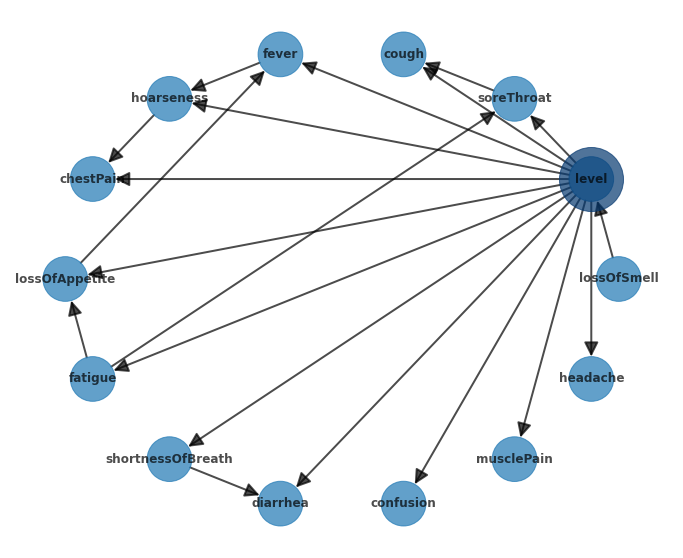

In [131]:
plt.figure(3,figsize=(12,10)) 
G = nx.DiGraph()
G.add_edges_from(model.edges)
G.add_nodes_from(model.nodes)
pos = nx.circular_layout(G)
DAG = G.to_directed()
nx.topological_sort(DAG)

nx.draw_networkx(G,
                pos=pos,
                with_labels=True,
                node_size=[2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000], # 14个 
                arrowsize=30,
                alpha=0.7,
                font_weight="bold",
                width=2.0)

tt_g = G.subgraph(nodes=['level'])
nx.draw(tt_g, pos=pos, with_labels=False, arrowsize=0, node_size=4100, alpha=0.7, font_weight="bold", node_color='#063970')

plt.show()

The arrows pointing from the 'level' variable to the other 13 variables (except for leesofsmell) reflect the causal relationship between these variables and the 'level' variable. This means that the value of the 'level' variable is influenced by the values of the other 13 variables. On the other hand, the other 13 variables may not be directly influenced by the value of the 'level' variable.

In [132]:
print(model.edges)

[('lossOfSmell', 'level'), ('soreThroat', 'cough'), ('fever', 'hoarseness'), ('hoarseness', 'chestPain'), ('lossOfAppetite', 'fever'), ('fatigue', 'soreThroat'), ('fatigue', 'lossOfAppetite'), ('shortnessOfBreath', 'diarrhea'), ('level', 'confusion'), ('level', 'musclePain'), ('level', 'headache'), ('level', 'fatigue'), ('level', 'diarrhea'), ('level', 'cough'), ('level', 'soreThroat'), ('level', 'chestPain'), ('level', 'shortnessOfBreath'), ('level', 'fever'), ('level', 'hoarseness'), ('level', 'lossOfAppetite')]


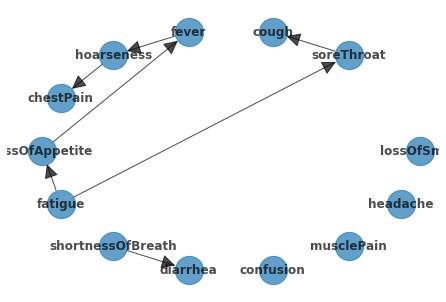

In [133]:
#A subgraph of graph "G" was created, including only nodes representing COVID symptoms
sub_g = G.subgraph(nodes=['headache','lossOfSmell','musclePain','cough','soreThroat','chestPain','fever','hoarseness','lossOfAppetite','diarrhea' ,'fatigue','confusion','shortnessOfBreath'])
nx.draw(sub_g, pos=pos, with_labels=True, arrowsize=30, node_size=800, alpha=0.7, font_weight="bold")  # Draw the original graph
plt.show()

In [134]:
#Collect prediction accuracy scores for all variables
from pgmpy.metrics.metrics import correlation_score, log_likelihood_score, structure_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

accuracy_dict = {}

for column in testing_data:
    predict_data = testing_data.copy()
    predict_data.drop(column, axis=1, inplace=True)
    y_pred = model.predict(predict_data)

    accuracy = accuracy_score(testing_data[column], y_pred)

    print(f'{column} Accuracy score: {accuracy}')

    accuracy_dict[column] = accuracy

  0%|          | 0/4091 [00:00<?, ?it/s]

headache Accuracy score: 0.71235


  0%|          | 0/4091 [00:00<?, ?it/s]

lossOfSmell Accuracy score: 0.7115


  0%|          | 0/4090 [00:00<?, ?it/s]

musclePain Accuracy score: 0.711975


  0%|          | 0/4092 [00:00<?, ?it/s]

cough Accuracy score: 0.7116


  0%|          | 0/4097 [00:00<?, ?it/s]

soreThroat Accuracy score: 0.714675


  0%|          | 0/4086 [00:00<?, ?it/s]

chestPain Accuracy score: 0.714225


  0%|          | 0/4086 [00:00<?, ?it/s]

fever Accuracy score: 0.714125


  0%|          | 0/4082 [00:00<?, ?it/s]

hoarseness Accuracy score: 0.714225


  0%|          | 0/4094 [00:00<?, ?it/s]

lossOfAppetite Accuracy score: 0.714125


  0%|          | 0/4093 [00:00<?, ?it/s]

diarrhea Accuracy score: 0.7138


  0%|          | 0/4089 [00:00<?, ?it/s]

fatigue Accuracy score: 0.716475


  0%|          | 0/4083 [00:00<?, ?it/s]

confusion Accuracy score: 0.713125


  0%|          | 0/4094 [00:00<?, ?it/s]

shortnessOfBreath Accuracy score: 0.714425


  0%|          | 0/7697 [00:00<?, ?it/s]

level Accuracy score: 0.9998


Accuracy metrics were calculated for the predictions made by the Bayesian network. The accuracy_score from the sklearn.metrics library is used to evaluate the predictions for each of the 14 symptoms (columns) in the test data. The accuracy score measures the proportion of correct predictions made by the model and the results are stored in the accuracy_dict dictionary, with the symptom name as the key and the accuracy score as the value.

In [135]:
sum = 0
for v in accuracy_dict.values():
    sum += v

accuracy_dict['Average'] = sum / len(accuracy_dict.keys())

accuracy_dict

#Accuracy may vary by symptom, but the overall average accuracy is high, around 73%

{'headache': 0.71235,
 'lossOfSmell': 0.7115,
 'musclePain': 0.711975,
 'cough': 0.7116,
 'soreThroat': 0.714675,
 'chestPain': 0.714225,
 'fever': 0.714125,
 'hoarseness': 0.714225,
 'lossOfAppetite': 0.714125,
 'diarrhea': 0.7138,
 'fatigue': 0.716475,
 'confusion': 0.713125,
 'shortnessOfBreath': 0.714425,
 'level': 0.9998,
 'Average': 0.7340303571428572}

In [136]:
#Obtain structure-related marks
f1 = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=f1_score, return_summary=False)
acc = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=accuracy_score, return_summary=False)
pr = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=precision_score, return_summary=False)
recall = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=recall_score, return_summary=False)
ls = log_likelihood_score(model=model, data=testing_data)
ss = structure_score(model=model, data=testing_data, scoring_method='bdeu')


print(f'F1 score: {f1}')
print(f'Accuracy score: {acc}')
print(f'Precision score: {pr}')
print(f'Recall score: {recall}')
print(f'Log-likilihood score: {ls}')
print(f'Structure score: {ss}')

print(model.name)

/Users/quinne/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.0
Accuracy score: 0.8901098901098901
Precision score: 0.0
Recall score: 0.0
Log-likilihood score: -264810.9228233893
Structure score: -265248.8751533862



In [137]:
print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd * 100, '\n')

#The output will show the CPT (conditional probability table) for each variable in the model
#CPT indicates the probability of each variable in the Bayesian network given its parent variable
#model.check_model() will return True if the model is in good form

Check model: True

CPT of headache:
+-------------+-------------------+-----+---------------------+
| level       | level(0. None)    | ... | level(3. Severe)    |
+-------------+-------------------+-----+---------------------+
| headache(0) | 49.90413926647367 | ... | 0.00273244947700917 |
+-------------+-------------------+-----+---------------------+
| headache(1) | 50.09586073352633 | ... | 99.99726755052299   |
+-------------+-------------------+-----+---------------------+ 

CPT of lossOfSmell:
+----------------+---------+
| lossOfSmell(0) | 28.5019 |
+----------------+---------+
| lossOfSmell(1) | 71.4981 |
+----------------+---------+ 

CPT of musclePain:
+---------------+-----+---------------------+
| level         | ... | level(3. Severe)    |
+---------------+-----+---------------------+
| musclePain(0) | ... | 0.00273244947700917 |
+---------------+-----+---------------------+
| musclePain(1) | ... | 99.99726755052299   |
+---------------+-----+---------------------+ 

CPT 

The table represents the conditional probability tables (CPTs) for various symptoms of a condition. Each CPT lists the probability that a symptom is present (1) or absent (0) given the severity of the symptom and the presence or absence of other associated symptoms. For example, the CPT for headache shows the probability of a headache occurring at the severity of the new crown level and in the presence or absence of other related symptoms.The CPT is useful for making probabilistic inferences about the presence or absence of a symptom in the presence or absence of other symptoms.

Headache (1): 50.1% Loss of sense of smell (1): 71.5% Muscle pain (1): 99.99% Cough (1): 49.88% Sore throat (1): 49.84% Chest pain (1): 50.48% Fever (1): 99.99% Hoarseness (1): 50.41% Loss of appetite (1): 99.99% Therefore, if a person has moderate new crown level, they have a 50.09% chance of experiencing this symptom. Similarly, if a person has a moderate level of neocon, they have a 99.99% chance of having this symptom of loss of appetite.

In [138]:
# #probabilistically verify the determinants of a Bayesian network
#Conditional probabilities under the maximum likelihood estimator
# Define the Bayesian network structure
model_con = BayesianModel([('headache', 'level'),
                       ('lossOfSmell', 'level'),
                       ('musclePain', 'level'),
                       ('cough', 'level'),
                       ('soreThroat', 'level'),
                       ('chestPain', 'level'),
                       ('fever', 'level'),
                       ('hoarseness', 'level'),
                       ('lossOfAppetite', 'level'),
                       ('diarrhea', 'level'),
                       ('fatigue', 'level'),
                       ('confusion', 'level'),
                       ('shortnessOfBreath', 'level')])

# Train the model using Maximum Likelihood Estimator
model.fit(df_concat, estimator=MaximumLikelihoodEstimator)

# Print the CPDs (Conditional Probability Distributions)
for cpt in model.get_cpds():
    print("CPT of node: ", cpt.variable)
    print(cpt)


/Users/quinne/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


CPT of node:  headache
+-------------+--------------------+-----+------------------+
| level       | level(0. None)     | ... | level(3. Severe) |
+-------------+--------------------+-----+------------------+
| headache(0) | 0.4994135564736363 | ... | 0.0              |
+-------------+--------------------+-----+------------------+
| headache(1) | 0.5005864435263637 | ... | 1.0              |
+-------------+--------------------+-----+------------------+
CPT of node:  lossOfSmell
+----------------+---------+
| lossOfSmell(0) | 0.28571 |
+----------------+---------+
| lossOfSmell(1) | 0.71429 |
+----------------+---------+
CPT of node:  musclePain
+---------------+-----+------------------+
| level         | ... | level(3. Severe) |
+---------------+-----+------------------+
| musclePain(0) | ... | 0.0              |
+---------------+-----+------------------+
| musclePain(1) | ... | 1.0              |
+---------------+-----+------------------+
CPT of node:  cough
+------------+------------

In [139]:
#If I take only two variables 'headache', 'lossOfSmell'
from pgmpy.models import BayesianModel
from pgmpy.estimators import MaximumLikelihoodEstimator

# Define the structure of the Bayesian network
model = BayesianModel([('headache', 'level'), ('lossOfSmell', 'level')])

# Generate random sample data

# Fit the parameters of the model to the data
model.fit(df_concat, estimator=MaximumLikelihoodEstimator)

# Print the conditional probability table for each node
for cpt in model.get_cpds():
    print("CPT of node: ", cpt.variable)
    print(cpt)

CPT of node:  headache
+-------------+----------+
| headache(0) | 0.285285 |
+-------------+----------+
| headache(1) | 0.714715 |
+-------------+----------+
CPT of node:  level
+--------------------+-----+---------------------+
| headache           | ... | headache(1)         |
+--------------------+-----+---------------------+
| lossOfSmell        | ... | lossOfSmell(1)      |
+--------------------+-----+---------------------+
| level(0. None)     | ... | 0.24863311369690172 |
+--------------------+-----+---------------------+
| level(1. Mild)     | ... | 0.25045562876769945 |
+--------------------+-----+---------------------+
| level(2. Moderate) | ... | 0.2504468666760129  |
+--------------------+-----+---------------------+
| level(3. Severe)   | ... | 0.25046439085938593 |
+--------------------+-----+---------------------+
CPT of node:  lossOfSmell
+----------------+---------+
| lossOfSmell(0) | 0.28571 |
+----------------+---------+
| lossOfSmell(1) | 0.71429 |
+----------------

/Users/quinne/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


In [140]:
#Switch back to Bayesian estimation machine + Bayesian model
# Define the Bayesian network structure
model_con = BayesianModel([('headache', 'level'),
                       ('lossOfSmell', 'level'),
                       ('musclePain', 'level'),
                       ('cough', 'level'),
                       ('soreThroat', 'level'),
                       ('chestPain', 'level'),
                       ('fever', 'level'),
                       ('hoarseness', 'level'),
                       ('lossOfAppetite', 'level'),
                       ('diarrhea', 'level'),
                       ('fatigue', 'level'),
                       ('confusion', 'level'),
                       ('shortnessOfBreath', 'level')])

# Train the model using Maximum Likelihood Estimator
est = BayesianEstimator(model_con, df_concat)

# Print the CPDs (Conditional Probability Distributions)
for cpd in est.get_parameters():
    print(cpd)

/Users/quinne/opt/anaconda3/lib/python3.9/site-packages/pgmpy/models/BayesianModel.py:8: FutureWarning: BayesianModel has been renamed to BayesianNetwork. Please use BayesianNetwork class, BayesianModel will be removed in future.
  warnings.warn(


+-------------+---------+
| headache(0) | 0.28529 |
+-------------+---------+
| headache(1) | 0.71471 |
+-------------+---------+
+--------------------+-----+-----------------------+
| chestPain          | ... | chestPain(1)          |
+--------------------+-----+-----------------------+
| confusion          | ... | confusion(1)          |
+--------------------+-----+-----------------------+
| cough              | ... | cough(1)              |
+--------------------+-----+-----------------------+
| diarrhea           | ... | diarrhea(1)           |
+--------------------+-----+-----------------------+
| fatigue            | ... | fatigue(1)            |
+--------------------+-----+-----------------------+
| fever              | ... | fever(1)              |
+--------------------+-----+-----------------------+
| headache           | ... | headache(1)           |
+--------------------+-----+-----------------------+
| hoarseness         | ... | hoarseness(1)         |
+--------------------+

In [141]:
#tree augmented naive bayes network
from pgmpy.estimators import TreeSearch

# learn graph structure
est = TreeSearch(training_data,root_node="lossOfSmell")
dag = est.estimate(estimator_type="tan", class_node='level')
#We can change the search method, as well as the exhaustive method, 
#or we can change the scoring criteria, for example k2score

Building tree:   0%|          | 0/91.0 [00:00<?, ?it/s]

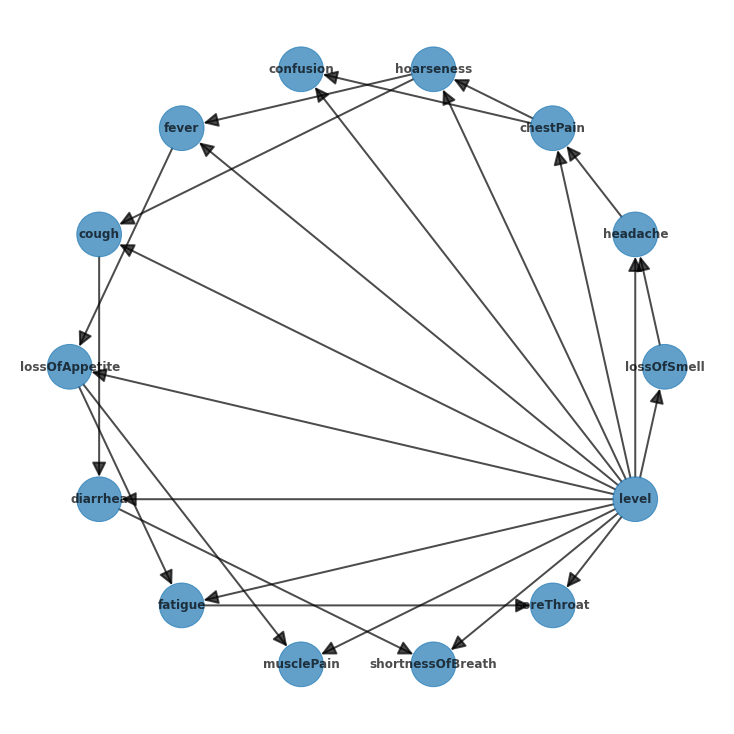

In [142]:
plt.figure(3,figsize=(10,10)) 

G = nx.DiGraph()
G.add_edges_from(dag.edges)
G.add_nodes_from(dag.nodes)
pos = nx.circular_layout(G)
nx.draw(G,
                pos=pos,
                with_labels=True,
                node_size=[2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000],
                arrowsize=30,
                alpha=0.7,
                font_weight="bold",
                width=2.0)  # Draw the original graph

plt.show()

In [143]:
from pgmpy.estimators import BayesianEstimator, MaximumLikelihoodEstimator, ExpectationMaximization
from pgmpy.models import BayesianModel, BayesianNetwork

model = BayesianNetwork(dag)

model.fit(data=training_data, estimator=BayesianEstimator, prior_type='BDeu')

model.get_cpds()

[<TabularCPD representing P(lossOfSmell:2 | level:4) at 0x7fe264ccb640>,
 <TabularCPD representing P(headache:2 | level:4, lossOfSmell:2) at 0x7fe230852460>,
 <TabularCPD representing P(chestPain:2 | headache:2, level:4) at 0x7fe256249d30>,
 <TabularCPD representing P(hoarseness:2 | chestPain:2, level:4) at 0x7fe270f59160>,
 <TabularCPD representing P(confusion:2 | chestPain:2, level:4) at 0x7fe2724e9d30>,
 <TabularCPD representing P(fever:2 | hoarseness:2, level:4) at 0x7fe2200b07f0>,
 <TabularCPD representing P(cough:2 | hoarseness:2, level:4) at 0x7fe264416c40>,
 <TabularCPD representing P(lossOfAppetite:2 | fever:2, level:4) at 0x7fe230b411f0>,
 <TabularCPD representing P(diarrhea:2 | cough:2, level:4) at 0x7fe2718fe7c0>,
 <TabularCPD representing P(fatigue:2 | level:4, lossOfAppetite:2) at 0x7fe272467280>,
 <TabularCPD representing P(musclePain:2 | level:4, lossOfAppetite:2) at 0x7fe2200b0d00>,
 <TabularCPD representing P(shortnessOfBreath:2 | diarrhea:2, level:4) at 0x7fe270f59ca

In [144]:
from pgmpy.metrics.metrics import correlation_score, log_likelihood_score, structure_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

accuracy_dict = {}

for column in testing_data:
    predict_data = testing_data.copy()
    predict_data.drop(column, axis=1, inplace=True)
    y_pred = model.predict(predict_data)

    accuracy = accuracy_score(testing_data[column], y_pred)
    
    print(f'{column} Accuracy score: {accuracy}')

    accuracy_dict[column] = accuracy

  0%|          | 0/4091 [00:00<?, ?it/s]

headache Accuracy score: 0.713025


  0%|          | 0/4091 [00:00<?, ?it/s]

lossOfSmell Accuracy score: 0.713025


  0%|          | 0/4090 [00:00<?, ?it/s]

musclePain Accuracy score: 0.712625


  0%|          | 0/4092 [00:00<?, ?it/s]

cough Accuracy score: 0.7135


  0%|          | 0/4097 [00:00<?, ?it/s]

soreThroat Accuracy score: 0.714675


  0%|          | 0/4086 [00:00<?, ?it/s]

chestPain Accuracy score: 0.713675


  0%|          | 0/4086 [00:00<?, ?it/s]

fever Accuracy score: 0.714125


  0%|          | 0/4082 [00:00<?, ?it/s]

hoarseness Accuracy score: 0.71305


  0%|          | 0/4094 [00:00<?, ?it/s]

lossOfAppetite Accuracy score: 0.71425


  0%|          | 0/4093 [00:00<?, ?it/s]

diarrhea Accuracy score: 0.7155


  0%|          | 0/4089 [00:00<?, ?it/s]

fatigue Accuracy score: 0.716475


  0%|          | 0/4083 [00:00<?, ?it/s]

confusion Accuracy score: 0.712825


  0%|          | 0/4094 [00:00<?, ?it/s]

shortnessOfBreath Accuracy score: 0.714425


  0%|          | 0/7697 [00:00<?, ?it/s]

level Accuracy score: 0.9998


In [145]:
sum = 0
for v in accuracy_dict.values():
    sum += v

accuracy_dict['Average'] = sum / len(accuracy_dict.keys())

accuracy_dict
# Similar to the results for complex Bayesian networks

{'headache': 0.713025,
 'lossOfSmell': 0.713025,
 'musclePain': 0.712625,
 'cough': 0.7135,
 'soreThroat': 0.714675,
 'chestPain': 0.713675,
 'fever': 0.714125,
 'hoarseness': 0.71305,
 'lossOfAppetite': 0.71425,
 'diarrhea': 0.7155,
 'fatigue': 0.716475,
 'confusion': 0.712825,
 'shortnessOfBreath': 0.714425,
 'level': 0.9998,
 'Average': 0.7343553571428572}

In [146]:
#Only the structure score improved by 9 points, -265239, for complex Bayesian networks: -265248
f1 = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=f1_score, return_summary=False)
acc = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=accuracy_score, return_summary=False)
pr = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=precision_score, return_summary=False)
recall = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=recall_score, return_summary=False)
ls = log_likelihood_score(model=model, data=testing_data)
ss = structure_score(model=model, data=testing_data, scoring_method='bdeu')


print(f'F1 score: {f1}')
print(f'Accuracy score: {acc}')
print(f'Precision score: {pr}')
print(f'Recall score: {recall}')
print(f'Log-likilihood score: {ls}')
print(f'Strcture score: {ss}')

/Users/quinne/opt/anaconda3/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


F1 score: 0.0
Accuracy score: 0.8901098901098901
Precision score: 0.0
Recall score: 0.0
Log-likilihood score: -264810.47414098127
Strcture score: -265239.5535024299


In [147]:
print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd * 100, '\n')

Check model: True

CPT of lossOfSmell:
+----------------+-----+---------------------+
| level          | ... | level(3. Severe)    |
+----------------+-----+---------------------+
| lossOfSmell(0) | ... | 0.00273244947700917 |
+----------------+-----+---------------------+
| lossOfSmell(1) | ... | 99.99726755052299   |
+----------------+-----+---------------------+ 

CPT of headache:
+-------------+-------------------+-----+-----------------------+
| level       | level(0. None)    | ... | level(3. Severe)      |
+-------------+-------------------+-----+-----------------------+
| lossOfSmell | lossOfSmell(0)    | ... | lossOfSmell(1)        |
+-------------+-------------------+-----+-----------------------+
| headache(0) | 49.44959308811719 | ... | 0.0013662620709253967 |
+-------------+-------------------+-----+-----------------------+
| headache(1) | 50.55040691188282 | ... | 99.99863373792908     |
+-------------+-------------------+-----+-----------------------+ 

CPT of chestPain:

model.feature_importances_: [0.11117619 0.11087131 0.10673232 0.07274223 0.06686473 0.0558437
 0.05102953 0.04333747 0.05197385 0.06701366 0.09016046 0.11330754
 0.058947  ]
[11  0  1  2 10  3  9  4 12  5  8  6  7]


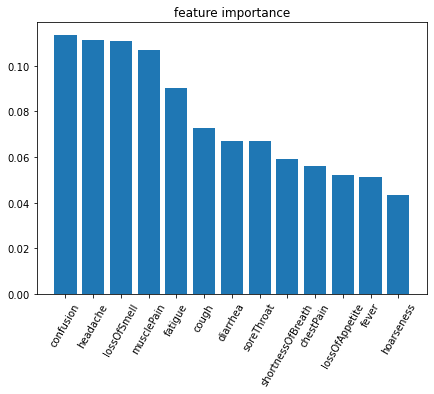

In [148]:
#random forest model
from sklearn.ensemble import RandomForestClassifier

X = training_data.drop('level',axis=1)
y = training_data['level']

feature_names = X.columns
model = RandomForestClassifier()
model.fit(X, y)

importances = model.feature_importances_
print("model.feature_importances_: {}".format(importances))

# print(importances)

indices = np.argsort(importances)[::-1]
print(indices)

names = [feature_names[i] for i in indices]

fig = plt.figure(figsize=(7,5))
plt.title("feature importance")
# features.shape[1]  
plt.bar(range(X.shape[1]), importances[indices])
plt.xticks(range(X.shape[1]), names, rotation=60)
plt.show()

#No particularly outstanding determinants yet

In [149]:
#Setting up dummy variables
pd.get_dummies(df_concat['level'])

,0. None,1. Mild,2. Moderate,3. Severe
0,0,1,0,0
1,0,1,0,0
2,0,0,1,0
3,0,0,1,0
4,0,0,0,1
...,...,...,...,...
199995,0,0,0,1
199996,1,0,0,0
199997,1,0,0,0
199998,1,0,0,0


In [150]:
df_concat1 = pd.concat([df_concat, pd.get_dummies(df_concat['level'])],axis=1)
df_concat1.drop(columns=['level'],inplace=True)

In [151]:
from sklearn.model_selection import train_test_split

training_data, testing_data = train_test_split(df_concat1, test_size=0.2, random_state=20)

In [152]:
hc = HillClimbSearch(data=training_data)
estimate = hc.estimate(scoring_method='k2score')

  0%|          | 0/1000000 [00:00<?, ?it/s]

In [153]:
#Generate a Bayesian Network object using the learned DAG
model = BayesianNetwork(estimate)

In [154]:
from pgmpy.estimators import BayesianEstimator, ExpectationMaximization, MaximumLikelihoodEstimator
from IPython.core.display import display, HTML
display(HTML("<style>div.output_area pre {white-space: pre;}</style>"))

model.cpds = []

model.fit(data=training_data,
    estimator=BayesianEstimator,
    prior_type='BDeu',
    complete_samples_only=True)

/var/folders/1v/gbft9lh97dggng6ytnnwkd9c0000gn/T/ipykernel_60765/4172007916.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


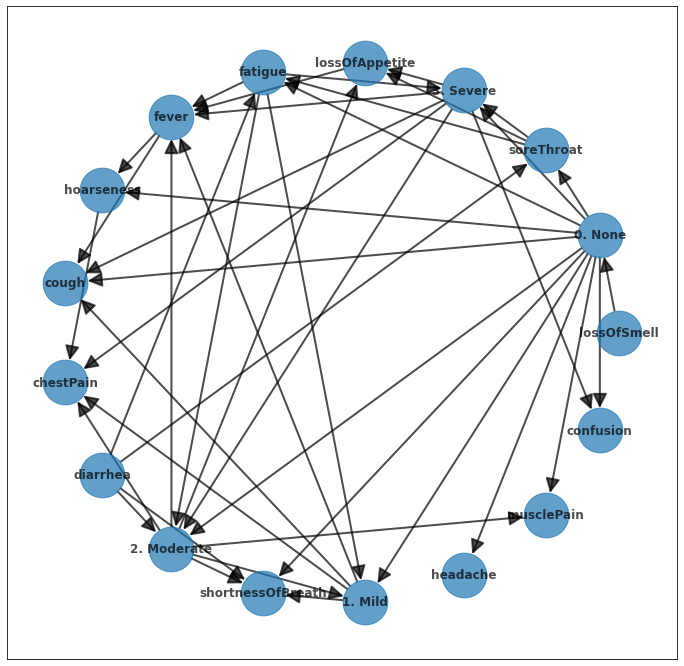

In [155]:
plt.figure(3,figsize=(12,12)) 
G = nx.DiGraph()
G.add_edges_from(model.edges)
G.add_nodes_from(model.nodes)
pos = nx.circular_layout(G)
DAG = G.to_directed()
nx.topological_sort(DAG)

nx.draw_networkx(G,
                pos=pos,
                with_labels=True,
                node_size=2000,#[2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000,2000], # 14个 
                arrowsize=30,
                alpha=0.7,
                font_weight="bold",
                width=2.0)

tt_g = G.subgraph(nodes=['level'])
nx.draw_networkx(tt_g, pos=pos, with_labels=False, arrowsize=0, node_size=4100, alpha=0.7, font_weight="bold", node_color='#063970')

plt.show()

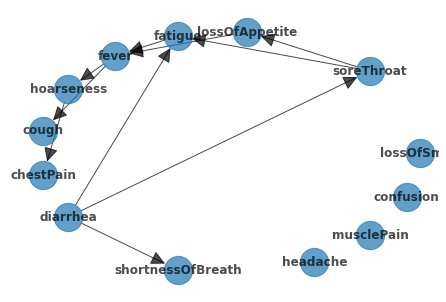

In [156]:
sub_g = G.subgraph(nodes=['headache','lossOfSmell','musclePain','cough','soreThroat','chestPain','fever','hoarseness','lossOfAppetite','diarrhea' ,'fatigue','confusion','shortnessOfBreath'])
nx.draw(sub_g, pos=pos, with_labels=True, arrowsize=30, node_size=800, alpha=0.7, font_weight="bold")  # Draw the original graph
plt.show()

In [157]:
from pgmpy.metrics.metrics import correlation_score, log_likelihood_score, structure_score
from sklearn.metrics import f1_score, accuracy_score, precision_score, recall_score

accuracy_dict = {}

for column in testing_data:
    predict_data = testing_data.copy()
    predict_data.drop(column, axis=1, inplace=True)
    y_pred = model.predict(predict_data)

    accuracy = accuracy_score(testing_data[column], y_pred)

    print(f'{column} Accuracy score: {accuracy}')

    accuracy_dict[column] = accuracy

  0%|          | 0/4091 [00:00<?, ?it/s]

headache Accuracy score: 0.71235


  0%|          | 0/4091 [00:00<?, ?it/s]

lossOfSmell Accuracy score: 0.7115


  0%|          | 0/4090 [00:00<?, ?it/s]

musclePain Accuracy score: 0.711975


  0%|          | 0/4092 [00:00<?, ?it/s]

cough Accuracy score: 0.7107


  0%|          | 0/4097 [00:00<?, ?it/s]

soreThroat Accuracy score: 0.714325


  0%|          | 0/4086 [00:00<?, ?it/s]

chestPain Accuracy score: 0.714225


  0%|          | 0/4086 [00:00<?, ?it/s]

fever Accuracy score: 0.712725


  0%|          | 0/4082 [00:00<?, ?it/s]

hoarseness Accuracy score: 0.714225


  0%|          | 0/4094 [00:00<?, ?it/s]

lossOfAppetite Accuracy score: 0.714125


  0%|          | 0/4093 [00:00<?, ?it/s]

diarrhea Accuracy score: 0.7144


  0%|          | 0/4089 [00:00<?, ?it/s]

fatigue Accuracy score: 0.711175


  0%|          | 0/4083 [00:00<?, ?it/s]

confusion Accuracy score: 0.713125


  0%|          | 0/4094 [00:00<?, ?it/s]

shortnessOfBreath Accuracy score: 0.714425


  0%|          | 0/7703 [00:00<?, ?it/s]

0. None Accuracy score: 1.0


  0%|          | 0/7703 [00:00<?, ?it/s]

1. Mild Accuracy score: 1.0


  0%|          | 0/7703 [00:00<?, ?it/s]

2. Moderate Accuracy score: 1.0


  0%|          | 0/7703 [00:00<?, ?it/s]

3. Severe Accuracy score: 1.0


In [158]:
sum = 0
for v in accuracy_dict.values():
    sum += v

accuracy_dict['Average'] = sum / len(accuracy_dict.keys())

accuracy_dict


{'headache': 0.71235,
 'lossOfSmell': 0.7115,
 'musclePain': 0.711975,
 'cough': 0.7107,
 'soreThroat': 0.714325,
 'chestPain': 0.714225,
 'fever': 0.712725,
 'hoarseness': 0.714225,
 'lossOfAppetite': 0.714125,
 'diarrhea': 0.7144,
 'fatigue': 0.711175,
 'confusion': 0.713125,
 'shortnessOfBreath': 0.714425,
 '0. None': 1.0,
 '1. Mild': 1.0,
 '2. Moderate': 1.0,
 '3. Severe': 1.0,
 'Average': 0.7805455882352942}

In [159]:
f1 = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=f1_score, return_summary=False)
acc = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=accuracy_score, return_summary=False)
pr = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=precision_score, return_summary=False)
recall = correlation_score(model=model, data=testing_data, test='chi_square', significance_level=0.05, score=recall_score, return_summary=False)
ls = log_likelihood_score(model=model, data=testing_data)
ss = structure_score(model=model, data=testing_data, scoring_method='bdeu')


print(f'F1 score: {f1}')
print(f'Accuracy score: {acc}')
print(f'Precision score: {pr}')
print(f'Recall score: {recall}')
print(f'Log-likilihood score: {ls}')
print(f'Structure score: {ss}')

print(model.name)

F1 score: 0.35294117647058826
Accuracy score: 0.9191176470588235
Precision score: 1.0
Recall score: 0.21428571428571427
Log-likilihood score: -264810.1517900896
Structure score: -265231.05237247236



In [160]:
print(f'Check model: {model.check_model()}\n')
for cpd in model.get_cpds():
    print(f'CPT of {cpd.variable}:')
    print(cpd * 100, '\n')

Check model: True

CPT of headache:
+-------------+-----------------------+-------------------+
| 0. None     | 0. None(0)            | 0. None(1)        |
+-------------+-----------------------+-------------------+
| headache(0) | 0.0018188299830485045 | 49.90414057921001 |
+-------------+-----------------------+-------------------+
| headache(1) | 99.99818117001695     | 50.09585942078999 |
+-------------+-----------------------+-------------------+ 

CPT of lossOfSmell:
+----------------+---------+
| lossOfSmell(0) | 28.5019 |
+----------------+---------+
| lossOfSmell(1) | 71.4981 |
+----------------+---------+ 

CPT of musclePain:
+---------------+-----+----------------+
| 0. None       | ... | 0. None(1)     |
+---------------+-----+----------------+
| 2. Moderate   | ... | 2. Moderate(1) |
+---------------+-----+----------------+
| musclePain(0) | ... | 50.0           |
+---------------+-----+----------------+
| musclePain(1) | ... | 50.0           |
+---------------+-----+-----